## Challenge goals

The goal is to predict the level of the 4 main pollutants :
- NO2 : nitrogen dioxyde
- PM10 : particulate matters below 10 nanometers
- PM2_5 : particulate matters below 2.5 nanometers
- O3 : Ozone
for the next 24 hours on a particular station inside an asian megacity


Note for reader: This is not the final report. This ipython notebook is mainly for exploration purposes.  

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [2]:
%matplotlib inline


In [3]:
labels = pd.read_csv("validation.csv", delimiter = ";")

In [4]:
print "number of rows in the train dataset %d"%df.shape[0]
print "number of columns in the train dataset %d"%df.shape[1]
print "number of rows in the validation dataset %d"%labels.shape[0]
print "number of columns in the validation dataset %d"%labels.shape[1]
print "number of rows in the test dataset %d"%test.shape[0]
print "number of columns in the test dataset %d"%test.shape[1]

number of rows in the train dataset 4031
number of columns in the train dataset 3729
number of rows in the validation dataset 4031
number of columns in the validation dataset 96
number of rows in the test dataset 984
number of columns in the test dataset 3729


In [5]:
# removing the date column as part of a first simple approach
data_train = df.iloc[:,1:]
data_test= test.iloc[:,1:]
data_labels = labels
#data standardizing (center to the mean and component wise scale to unit variance)
#from sklearn.preprocessing import scale
#data_train = scale(train, axis = 0)
#data_labels = scale(labels, axis = 0)
#data_test = scale(test, axis = 0)

In [6]:
#Building a train test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, data_labels, test_size=0.2, random_state=42)

In [14]:
"""
Benchmarking Simple models without any considerations for submodels
Ideas (en plus des remarques de Hugo) 
-build a different model for each indicator [NO2, PM10, PM2-5, O3] with potentially a 
submodel for each hour ie 4 models or 96 models
-Consider feature selection
- 

"""
#Ridge regression 
from time import time
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
start = time()
clf=Ridge(alpha=0.1,normalize=True,solver='lsqr')
clf.fit(X_train,y_train)
end = time()-start
print "Fitting the model took %d seconds" %end
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
print "MSE : ", mean_squared_error(y_test,y_pred)
print "R2 : ",r2_score(y_test,y_pred)

#



Fitting the model took 64 seconds
MSE :  85.1251330963
R2 :  0.720612586789
Fitting the model took 52 seconds
MSE : 

/home/asus/anaconda/lib/python2.7/site-packages/sklearn/metrics/regression.py:471: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value, it will be changed to 'uniform_average' in 0.18.
  DeprecationWarning)
/home/asus/anaconda/lib/python2.7/site-packages/sklearn/metrics/regression.py:471: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value, it will be changed to 'uniform_average' in 0.18.
  DeprecationWarning)


 208.281641535
R2 :  0.316403194553


In [18]:
#Ridge regression 
from time import time
from sklearn.linear_model import Ridge
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Lasso
start = time()
clf = MultiTaskLassoCV(alphas=[0.1, 1.0, 10.0], fit_intercept=True, normalize = True)
clf.fit(X_train,y_train)
end = time()-start
scores = cross_validation.cross_val_score(Lasso(alpha=0.1), X_train,y_train, scoring='mean_squared_error', cv=5)
print "Fitting the model took %d seconds" %end
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
print "MSE : ", mean_squared_error(y_test,y_pred)
print "R2 : ",r2_score(y_test,y_pred)


Fitting the model took 1129 seconds
MSE :  130.460406122
R2 :  0.571818638433


/home/asus/anaconda/lib/python2.7/site-packages/sklearn/metrics/regression.py:471: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value, it will be changed to 'uniform_average' in 0.18.
  DeprecationWarning)


In [20]:
from sklearn.linear_model import Lasso
from sklearn import cross_validation

scores = cross_validation.cross_val_score(Lasso(alpha=0.1), X_train,y_train, scoring='mean_squared_error', cv=5)

/home/asus/anaconda/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:466: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations
  ConvergenceWarning)


In [ ]:

fig, ax = plt.subplots()
plt.hold("on")
ax.plot(np.arange(0,96),np.mean(y_test,axis=0),color="red",label="Average real value")
ax.plot(np.arange(0,96),np.mean(y_pred,axis=0),color="blue",label="Average predicted value")
ax.axvline(x=24,color="grey",linestyle="dashed")
ax.axvline(x=48,color="grey",linestyle="dashed")
ax.axvline(x=72,color="grey",linestyle="dashed")
ax.set_xlabel('Polutant')
ax.set_ylabel("Concentration")
ax.legend(loc="lower right")
plt.hold("off")
plt.show()

#%% Let's have a look at the weights, in average, of the regression coefficients

coefs=clf.coef_
fig, ax = plt.subplots()
ax.bar(np.arange(0,3728),np.mean(coefs,axis=0), color = "blue")
ax.set_xlabel('Coefficent index')
ax.set_ylabel("Average value")
plt.show()

#check the most important coeffs, in average
threshold = 0.3
important_coefs=np.abs(np.mean(coefs,axis=0))>threshold
important_coefs_names=data_train.columns[important_coefs]

In [14]:
#Random Forest Regressor
from sklearn.ensemble.forest import RandomForestRegressor
start = time()
clf=RandomForestRegressor(n_estimators = 10,criterion='mse')
clf.fit(X_train,y_train)
end = time()-start
print "Fitting the model took %d seconds"%end
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_test)
print "MSE : ", mean_squared_error(y_test,y_pred)
print "R2 : ",r2_score(y_test,y_pred)

Fitting the model took 249 seconds
MSE :  79.7293584903
R2 :  0.738321945407


/home/asus/anaconda/lib/python2.7/site-packages/sklearn/metrics/regression.py:471: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value, it will be changed to 'uniform_average' in 0.18.
  DeprecationWarning)


In [10]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session

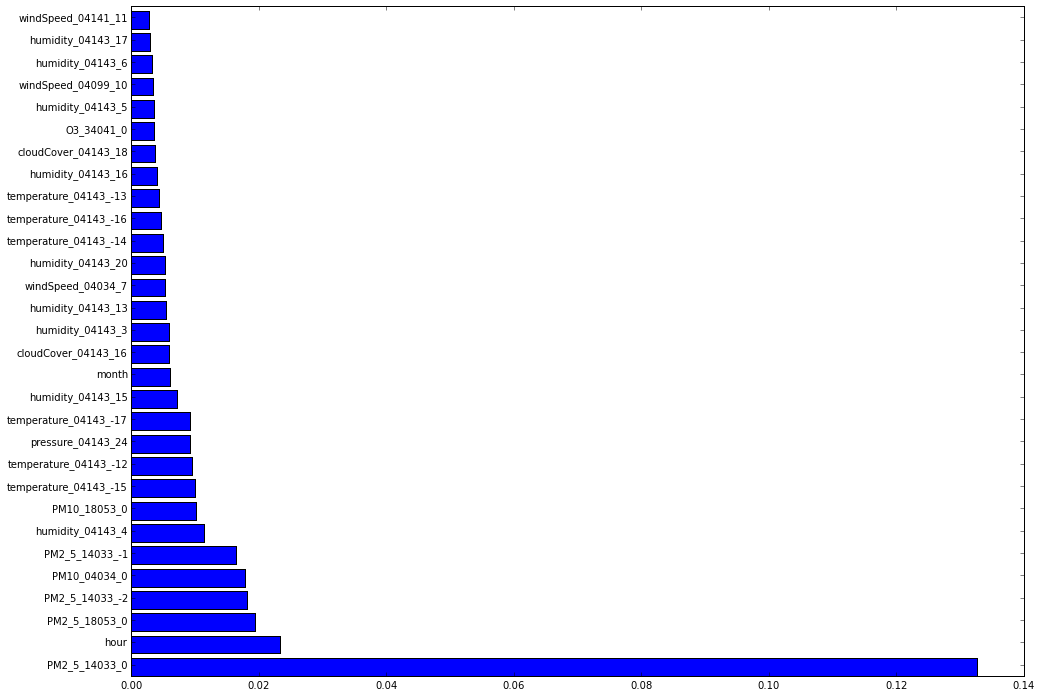

In [21]:

ordering = np.argsort(clf.feature_importances_)[::-1][:30]

importances = clf.feature_importances_[ordering]
feature_names= data_train.columns[ordering]

x = np.arange(len(feature_names))
plt.barh(x, importances)
plt.yticks(x + 0.5, feature_names, fontsize=10);

#should we perform fetaure selection for the features that we have obtained with the random forest ?
# Should we also consider outlier detection ? 


In [22]:
#training the Random Forest Regressor on the entire dataset
from sklearn.ensemble.forest import RandomForestRegressor
clf=RandomForestRegressor(n_estimators = 250,criterion='mse')
#passer de 150 à 250 estimateurs nous fait passer de 20399.1 à 20274.8 sur le leaderboard
clf.fit(data_train, data_labels)
y_pred_final = clf.predict(data_test)
y_pred_final = pd.DataFrame(y_pred_final, columns = data_labels.columns)
y_pred_final.to_csv("./result.csv",index=False,sep=";")

#maybe try using a sliding window for features i.e if we have predicted  the value for the first column 
#try using that predicted column as a new feature


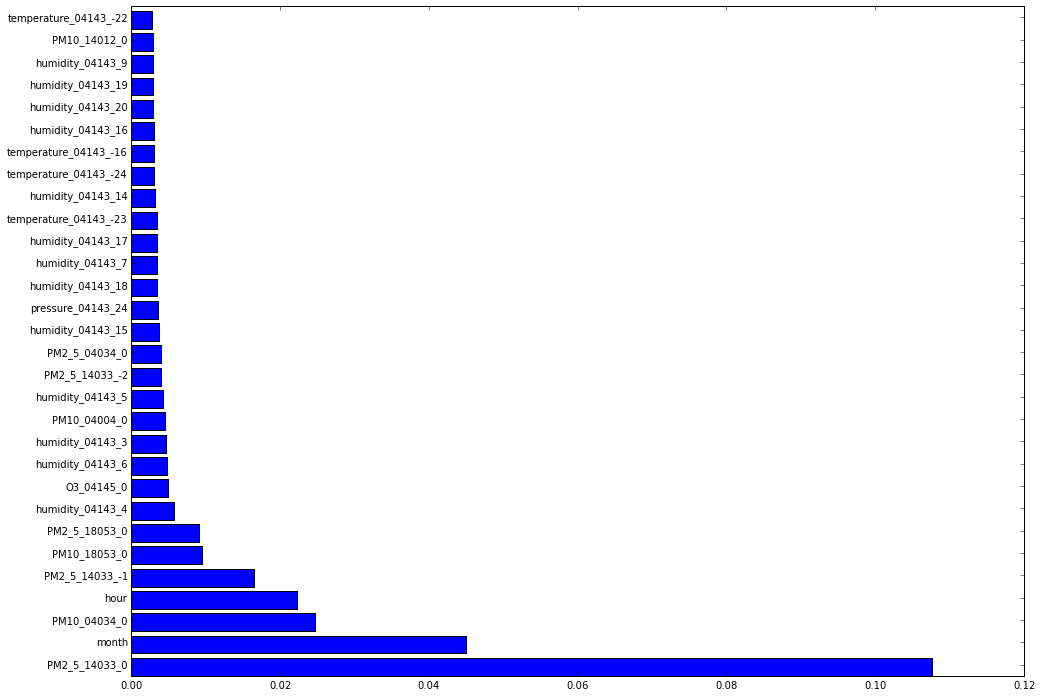

In [25]:

ordering = np.argsort(clf.feature_importances_)[::-1][:30]

importances = clf.feature_importances_[ordering]
feature_names= data_train.columns[ordering]

x = np.arange(len(feature_names))
plt.barh(x, importances)
plt.yticks(x + 0.5, feature_names, fontsize=10);

In [30]:
y_pred_final.to_csv("./result.csv",index=False,sep=";")

In [19]:
import sklearn
class VectorRegression(sklearn.base.BaseEstimator):
    def __init__(self, estimator):
        self.estimator = estimator

    def fit(self, X, y):
        n, m = y.shape
        # Fit a separate regressor for each column of y
        self.estimators_ = [sklearn.base.clone(self.estimator).fit(X, y[y.columns[i]]) for i in range(m)]
        return self

    def predict(self, X,n,m):
        # Join regressors' predictions
        y_pred =np.zeros((n,m))
        i=0
        for est in self.estimators_:
            y_pred[:,i] = est.predict(X)
            i= i+1
        return y_pred

In [20]:
from sklearn import ensemble
params = {'n_estimators': 10, 'max_depth': 4, 'min_samples_split': 1,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = VectorRegression(ensemble.GradientBoostingRegressor(**params))
clf.fit(X_train, y_train)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
n,m = y_test.shape
y_pred = clf.predict(X_test,n,m)
print "MSE : ", mean_squared_error(y_test,y_pred)
print "R2 : ",r2_score(y_test,y_pred)
#why isn't working ?

MSE :  273.109195792
R2 :  0.103634038962


/home/asus/anaconda/lib/python2.7/site-packages/sklearn/metrics/regression.py:471: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value, it will be changed to 'uniform_average' in 0.18.
  DeprecationWarning)


In [7]:
X_train.shape
y_train.shape
print y_train.columns

PM2 = y_train.filter(regex='PM2')
PM10 = y_train.filter(regex='PM10')
O3 = y_train.filter(regex= "O3")
NO2= y_train.filter(regex= "NO2")
PM2_test = y_test.filter(regex='PM2')
PM10_test  = y_test.filter(regex='PM10')
O3_test  = y_test.filter(regex= "O3")
NO2_test = y_test.filter(regex= "NO2")

Index([u'PM2_5_04143_1', u'PM2_5_04143_2', u'PM2_5_04143_3', u'PM2_5_04143_4',
       u'PM2_5_04143_5', u'PM2_5_04143_6', u'PM2_5_04143_7', u'PM2_5_04143_8',
       u'PM2_5_04143_9', u'PM2_5_04143_10', u'PM2_5_04143_11',
       u'PM2_5_04143_12', u'PM2_5_04143_13', u'PM2_5_04143_14',
       u'PM2_5_04143_15', u'PM2_5_04143_16', u'PM2_5_04143_17',
       u'PM2_5_04143_18', u'PM2_5_04143_19', u'PM2_5_04143_20',
       u'PM2_5_04143_21', u'PM2_5_04143_22', u'PM2_5_04143_23',
       u'PM2_5_04143_24', u'PM10_04143_1', u'PM10_04143_2', u'PM10_04143_3',
       u'PM10_04143_4', u'PM10_04143_5', u'PM10_04143_6', u'PM10_04143_7',
       u'PM10_04143_8', u'PM10_04143_9', u'PM10_04143_10', u'PM10_04143_11',
       u'PM10_04143_12', u'PM10_04143_13', u'PM10_04143_14', u'PM10_04143_15',
       u'PM10_04143_16', u'PM10_04143_17', u'PM10_04143_18', u'PM10_04143_19',
       u'PM10_04143_20', u'PM10_04143_21', u'PM10_04143_22', u'PM10_04143_23',
       u'PM10_04143_24', u'O3_04143_1', u'O3_04143_2', u'

0
Fitting the model took 1006 seconds


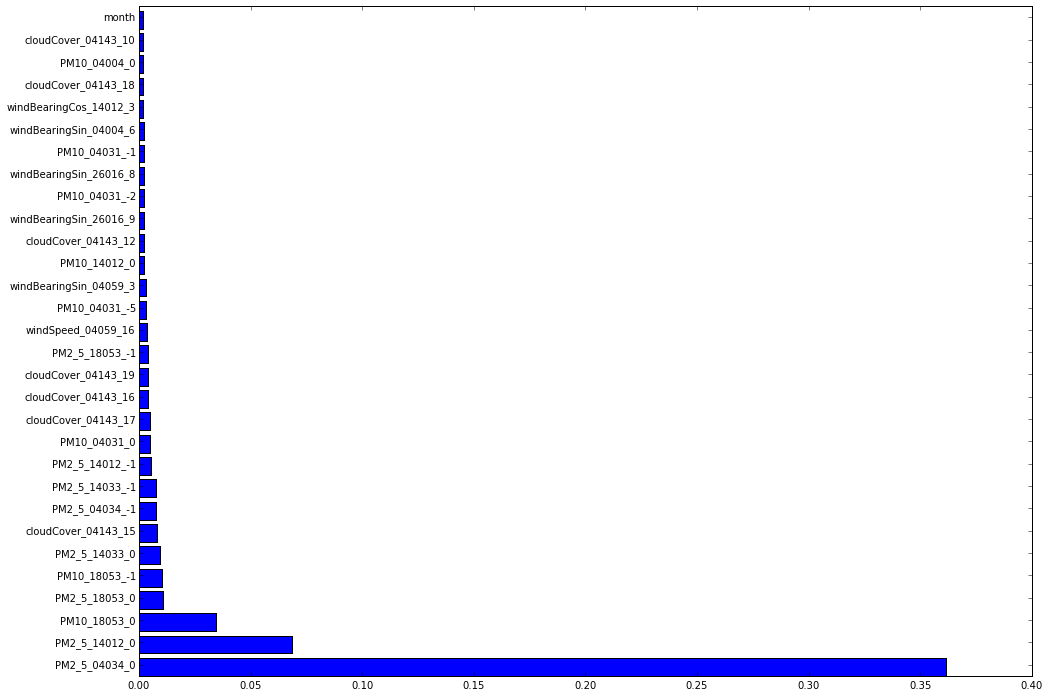

(807, 24)
[[ 10.05569023   9.81219074   9.81720339 ...,   0.           0.           0.        ]
 [  7.48317845   8.08459537   8.34607345 ...,   0.           0.           0.        ]
 [ 12.38626767  11.30259537  11.12520339 ...,   0.           0.           0.        ]
 ..., 
 [  7.9          7.30137931   7.03275862 ...,   0.           0.           0.        ]
 [ 11.71542256  11.80229768  12.50720339 ...,   0.           0.           0.        ]
 [  9.88496993   9.52817877   9.68840678 ...,   0.           0.           0.        ]]
24
24
Fitting the model took 1001 seconds


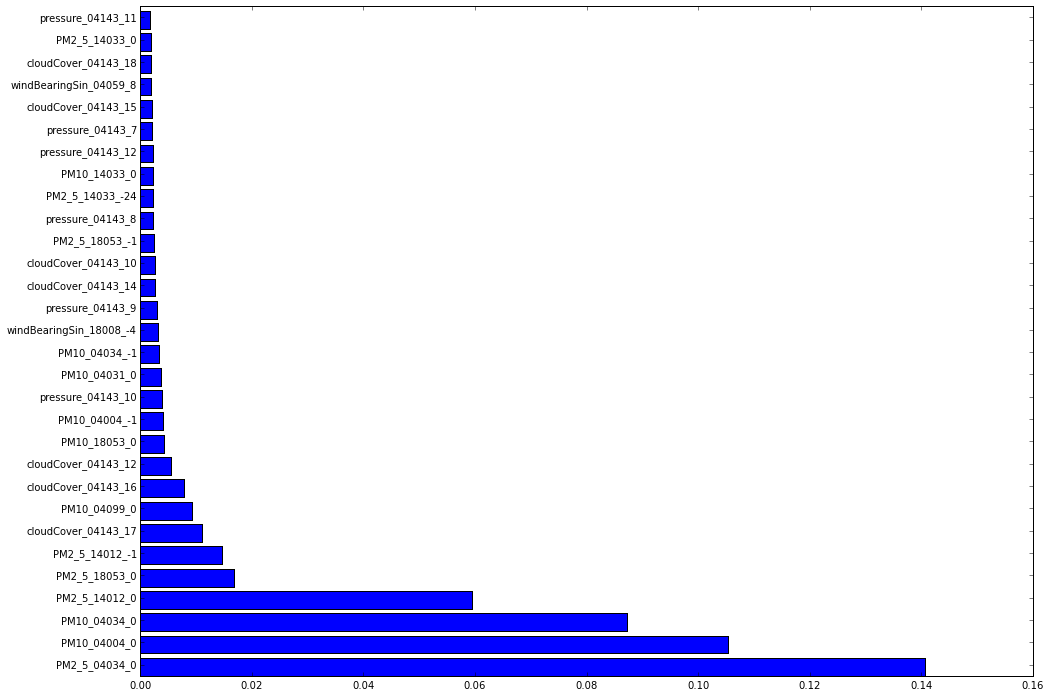

(807, 24)
[[ 10.05569023   9.81219074   9.81720339 ...,   0.           0.           0.        ]
 [  7.48317845   8.08459537   8.34607345 ...,   0.           0.           0.        ]
 [ 12.38626767  11.30259537  11.12520339 ...,   0.           0.           0.        ]
 ..., 
 [  7.9          7.30137931   7.03275862 ...,   0.           0.           0.        ]
 [ 11.71542256  11.80229768  12.50720339 ...,   0.           0.           0.        ]
 [  9.88496993   9.52817877   9.68840678 ...,   0.           0.           0.        ]]
48
48
Fitting the model took 930 seconds


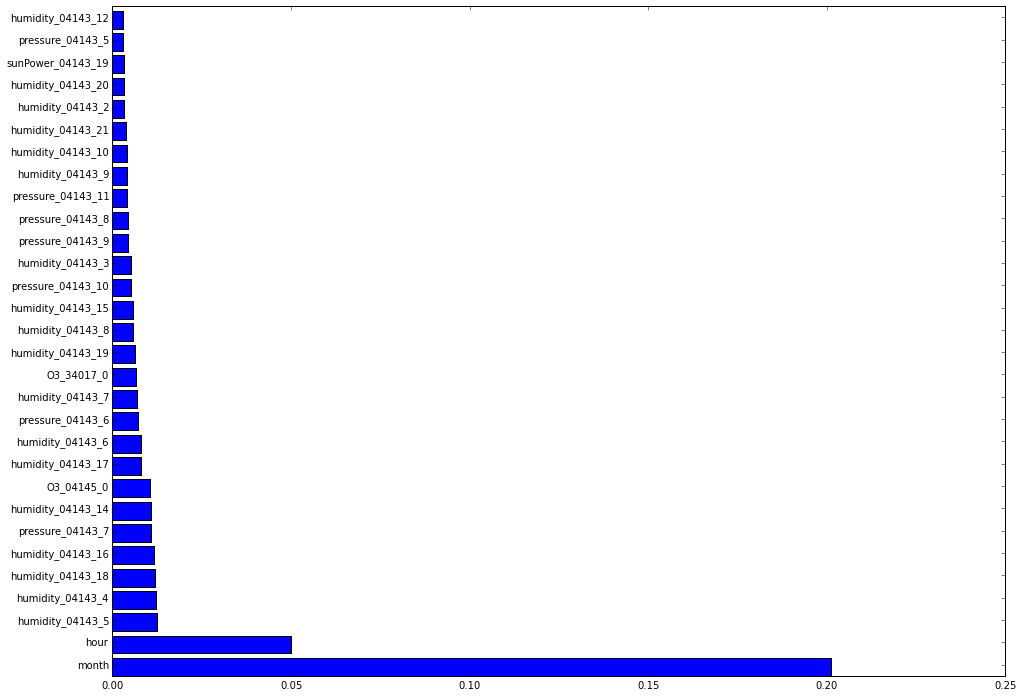

(807, 24)
[[ 10.05569023   9.81219074   9.81720339 ...,   0.           0.           0.        ]
 [  7.48317845   8.08459537   8.34607345 ...,   0.           0.           0.        ]
 [ 12.38626767  11.30259537  11.12520339 ...,   0.           0.           0.        ]
 ..., 
 [  7.9          7.30137931   7.03275862 ...,   0.           0.           0.        ]
 [ 11.71542256  11.80229768  12.50720339 ...,   0.           0.           0.        ]
 [  9.88496993   9.52817877   9.68840678 ...,   0.           0.           0.        ]]
72
72
Fitting the model took 1006 seconds


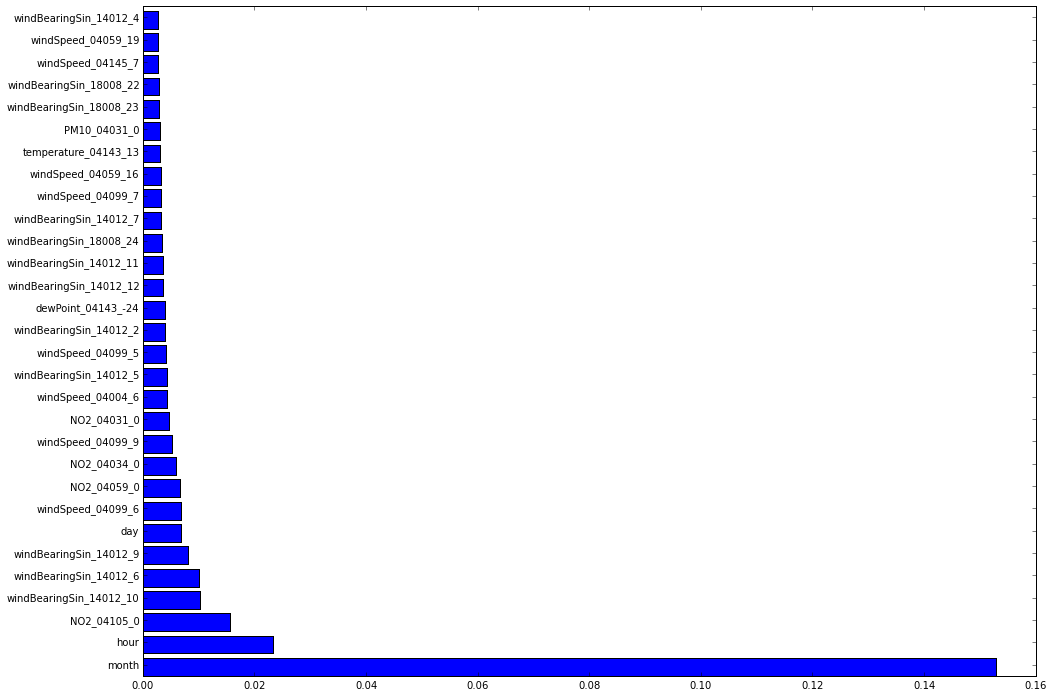

(807, 24)
[[ 10.05569023   9.81219074   9.81720339 ...,  42.85598338  38.88585711
   35.61      ]
 [  7.48317845   8.08459537   8.34607345 ...,  54.02098338  49.46585711
   48.01274818]
 [ 12.38626767  11.30259537  11.12520339 ...,  60.06897507  57.51585711
   55.23274818]
 ..., 
 [  7.9          7.30137931   7.03275862 ...,  19.71        16.71        13.638     ]
 [ 11.71542256  11.80229768  12.50720339 ...,  36.12        36.85        42.29      ]
 [  9.88496993   9.52817877   9.68840678 ...,  17.07        17.37666667
   17.29333333]]
96
Fitting the model took 1006 seconds
MSE :  61.7320142205
R2 :  0.797390651409


/home/asus/anaconda/lib/python2.7/site-packages/sklearn/metrics/regression.py:471: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value, it will be changed to 'uniform_average' in 0.18.
  DeprecationWarning)


In [66]:
from sklearn.ensemble.forest import RandomForestRegressor

n,m = y_test.shape

y_pred = np.zeros((n,m))
i=0
s = [PM2, PM10, O3,NO2]
clfs = []
for target in s:
    print i 
    start = time()
    l = len(target.columns)
    clf=RandomForestRegressor(n_estimators = 10,criterion='mse')
    clf.fit(X_train,target)
    end = time()-start
    print "Fitting the model took %d seconds"%end
    
    ordering = np.argsort(clf.feature_importances_)[::-1][:30]

    importances = clf.feature_importances_[ordering]
    feature_names= data_train.columns[ordering]

    x = np.arange(len(feature_names))
    plt.barh(x, importances)
    plt.yticks(x + 0.5, feature_names, fontsize=10)
    plt.show()
    clfs.append(clf)
    pred = clf.predict(X_test)
    print pred.shape
    y_pred[:, i:i+l] = pred[:]
    print y_pred
    i = i+l
    print i 
    
    

print "Fitting the model took %d seconds"%end
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print "MSE : ", mean_squared_error(y_test,y_pred)
print "R2 : ",r2_score(y_test,y_pred)
    
    

In [17]:
from visualization import *


TypeError: 'str' object is not callable

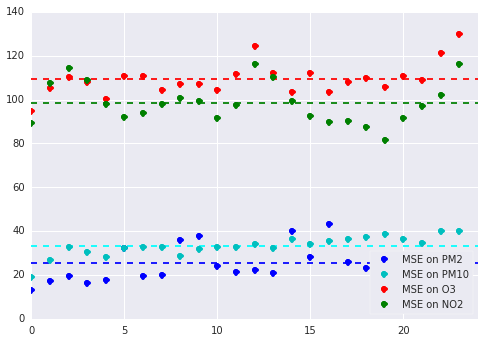

In [89]:
y_test2 = y_test.values

plot_MSE_per_hour(y_pred, y_test2)

0
PM2_5_04143_1


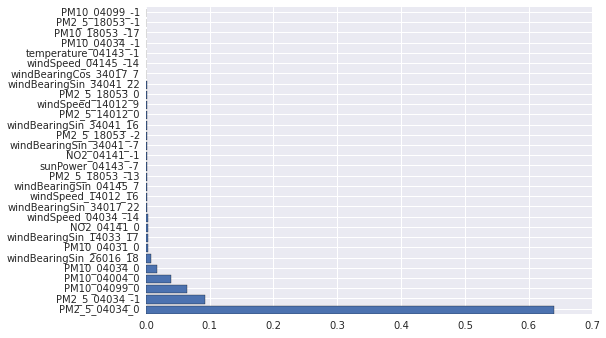

Fitting the model took 161 seconds
PM2_5_04143_2


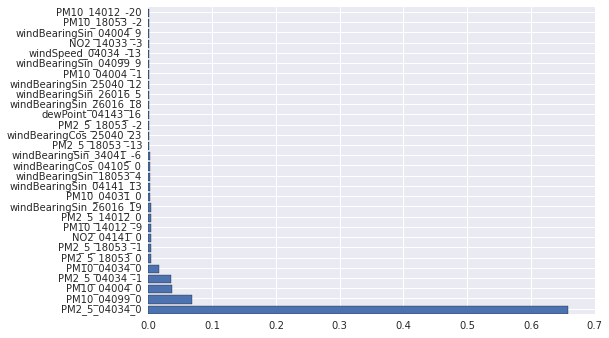

Fitting the model took 157 seconds
PM2_5_04143_3


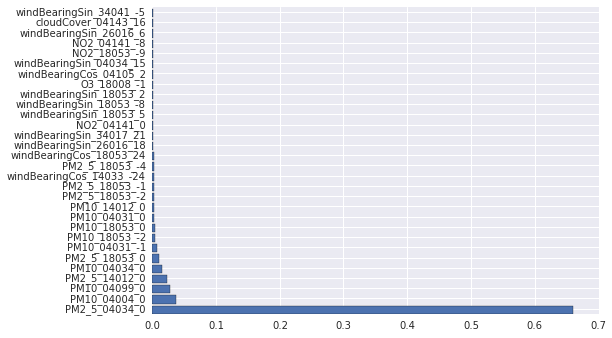

Fitting the model took 155 seconds
PM2_5_04143_4


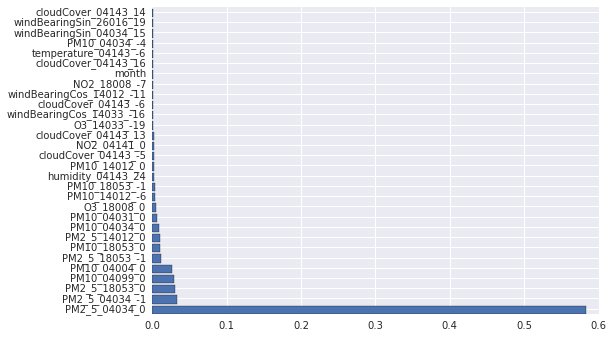

Fitting the model took 155 seconds
PM2_5_04143_5


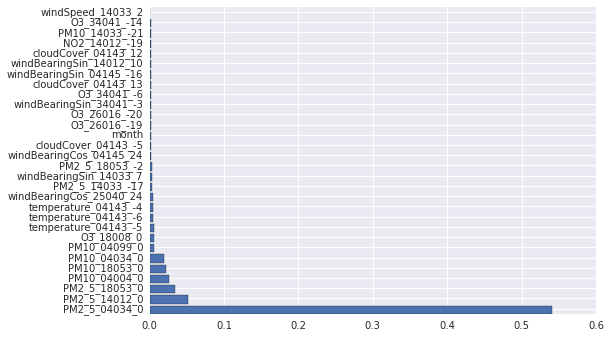

Fitting the model took 159 seconds
PM2_5_04143_6


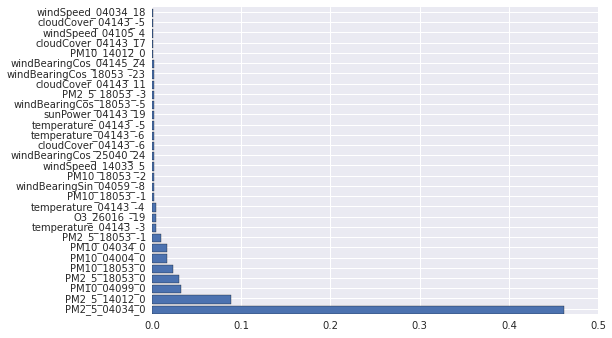

Fitting the model took 159 seconds
PM2_5_04143_7


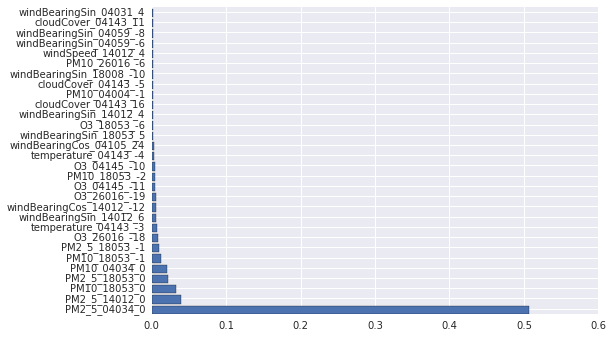

Fitting the model took 158 seconds
PM2_5_04143_8


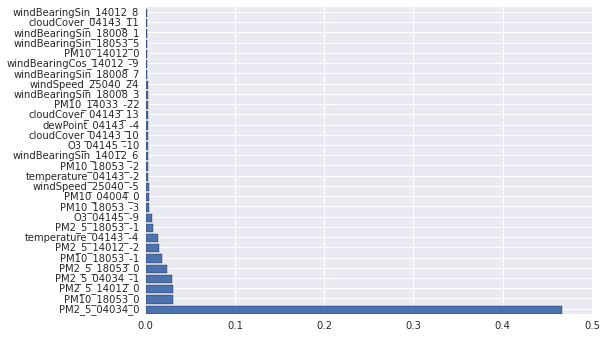

Fitting the model took 159 seconds
PM2_5_04143_9


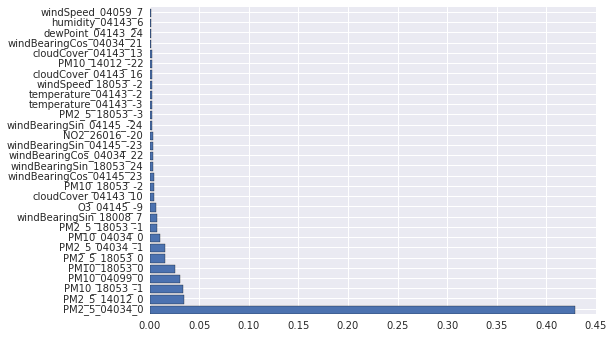

Fitting the model took 163 seconds
PM2_5_04143_10


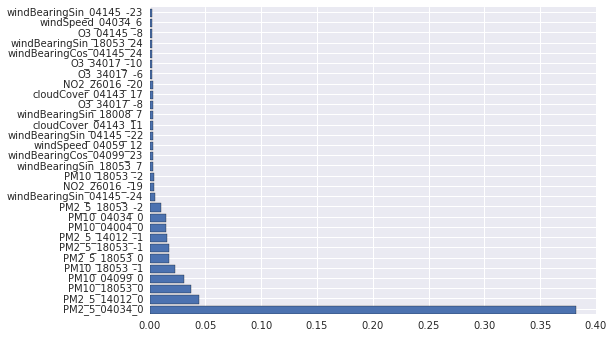

Fitting the model took 161 seconds
PM2_5_04143_11


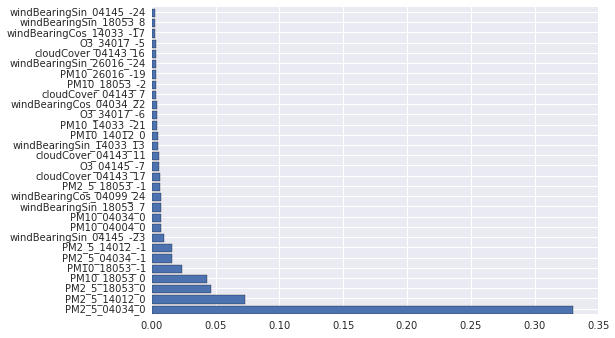

Fitting the model took 163 seconds
PM2_5_04143_12


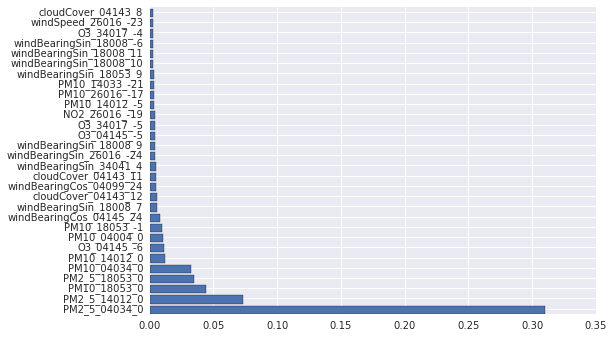

Fitting the model took 162 seconds
PM2_5_04143_13


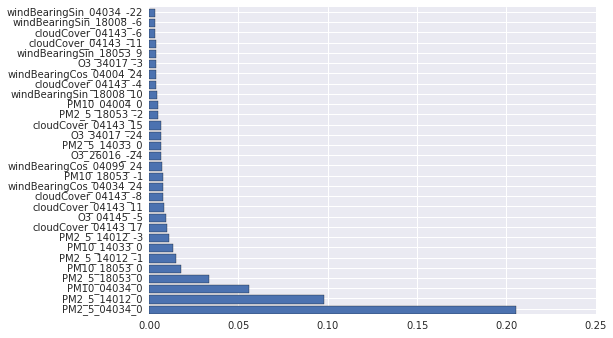

Fitting the model took 164 seconds
PM2_5_04143_14


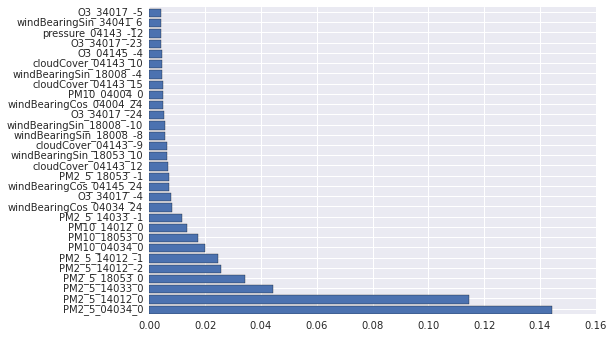

Fitting the model took 160 seconds
PM2_5_04143_15


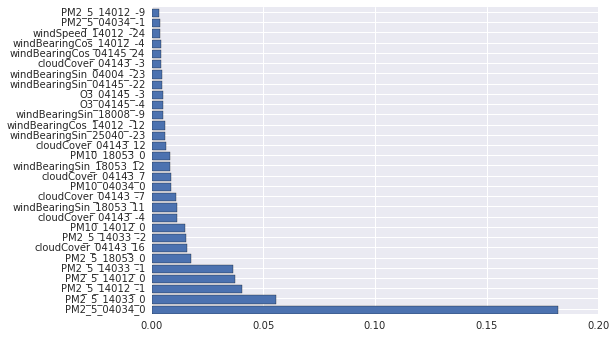

Fitting the model took 161 seconds
PM2_5_04143_16


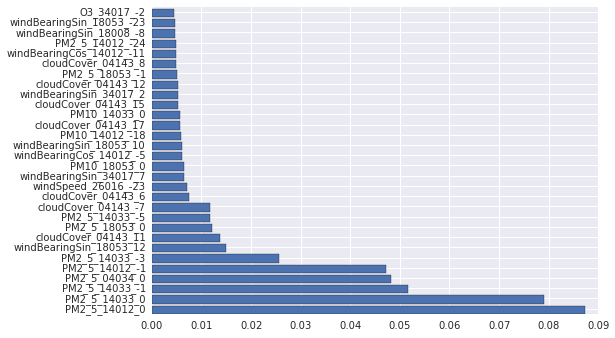

Fitting the model took 163 seconds
PM2_5_04143_17


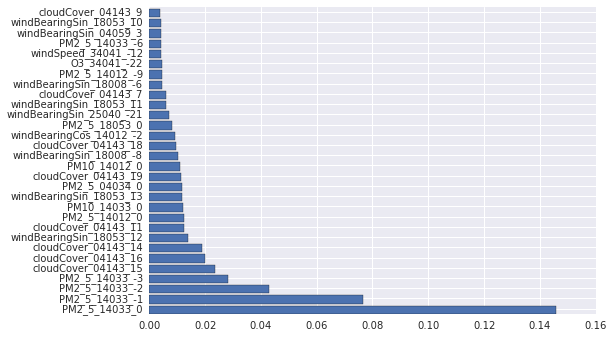

Fitting the model took 162 seconds
PM2_5_04143_18


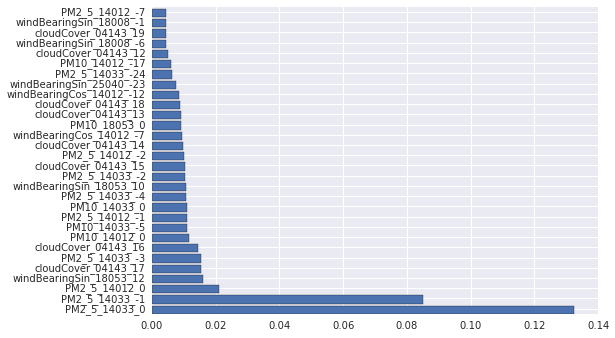

Fitting the model took 163 seconds
PM2_5_04143_19


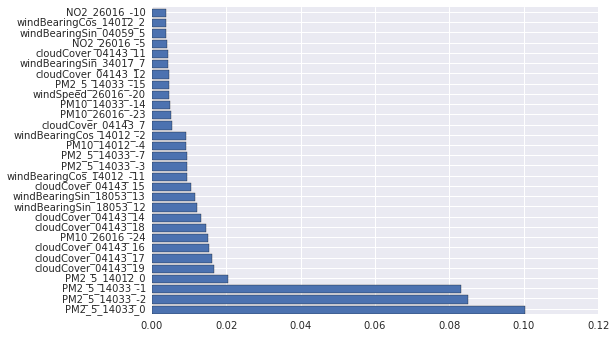

Fitting the model took 162 seconds
PM2_5_04143_20


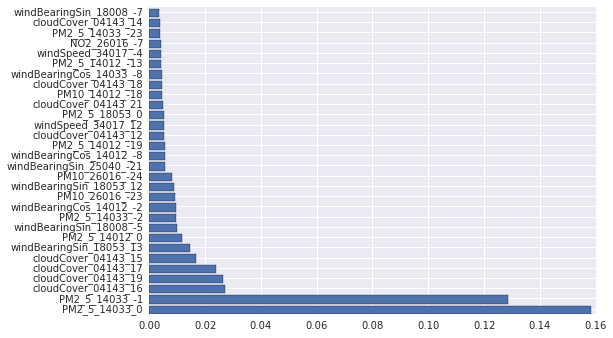

Fitting the model took 163 seconds
PM2_5_04143_21


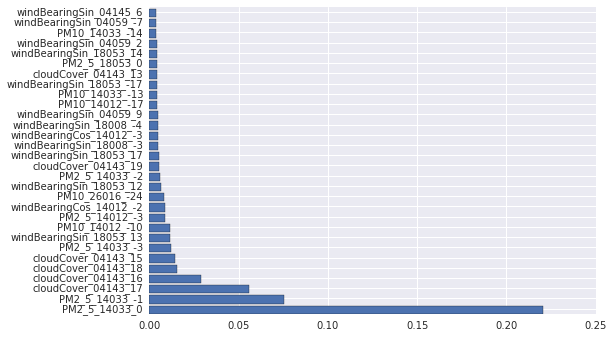

Fitting the model took 163 seconds
PM2_5_04143_22


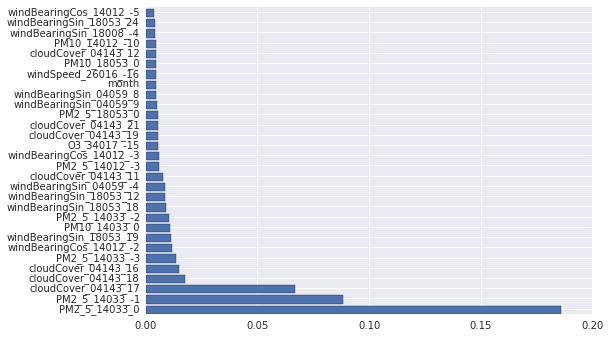

Fitting the model took 162 seconds
PM2_5_04143_23


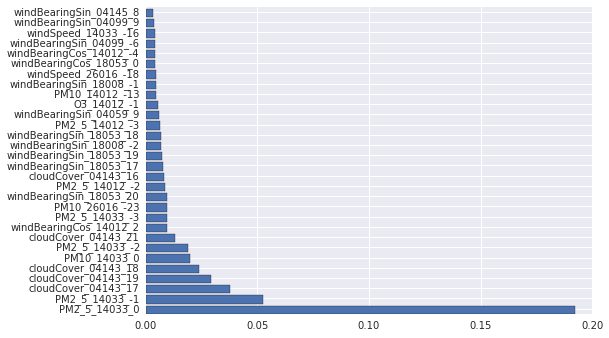

Fitting the model took 164 seconds
PM2_5_04143_24


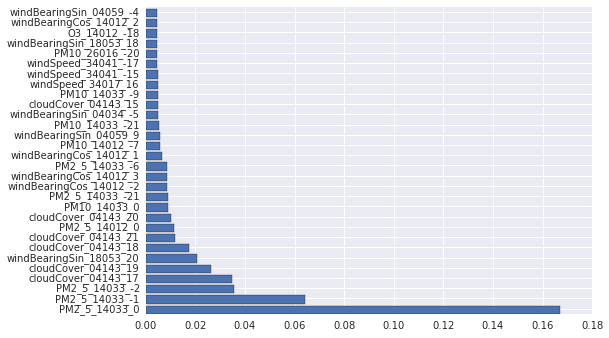

Fitting the model took 163 seconds
24
PM10_04143_1


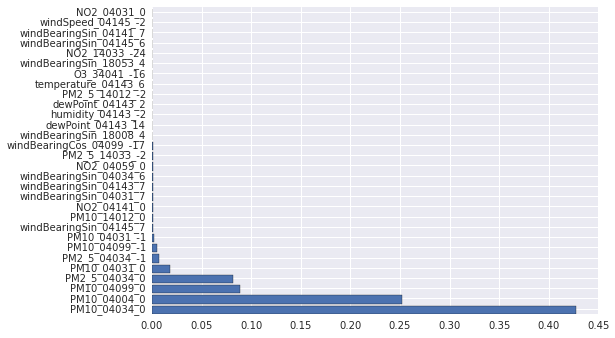

Fitting the model took 153 seconds
PM10_04143_2


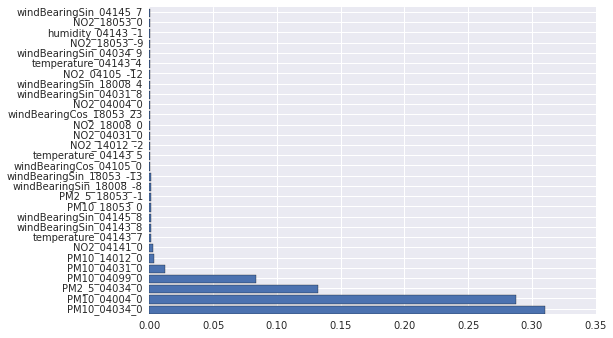

Fitting the model took 155 seconds
PM10_04143_3


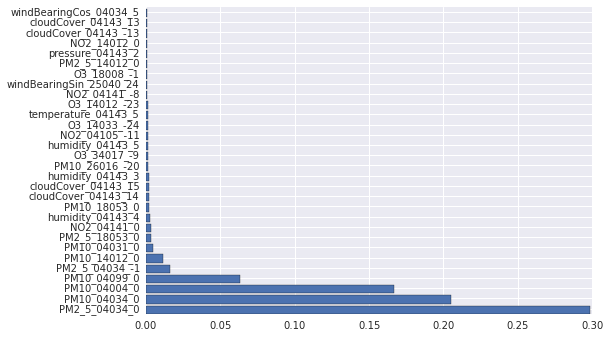

Fitting the model took 160 seconds
PM10_04143_4


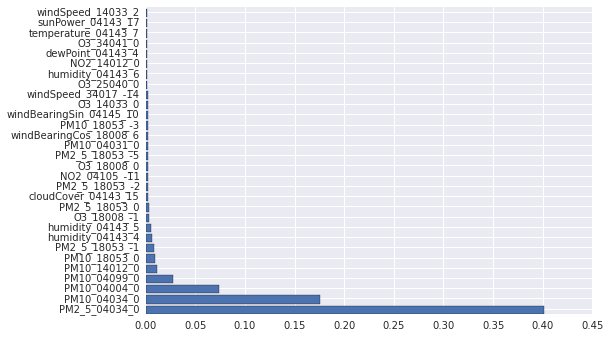

Fitting the model took 163 seconds
PM10_04143_5


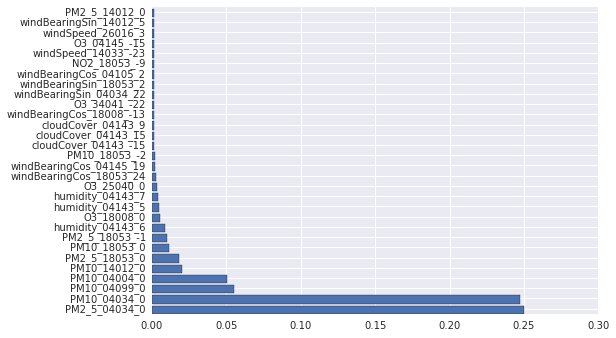

Fitting the model took 162 seconds
PM10_04143_6


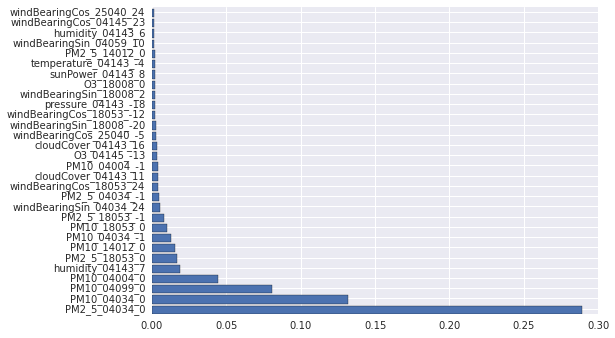

Fitting the model took 160 seconds
PM10_04143_7


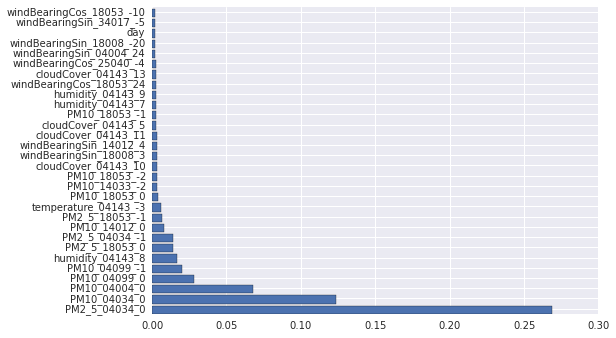

Fitting the model took 164 seconds
PM10_04143_8


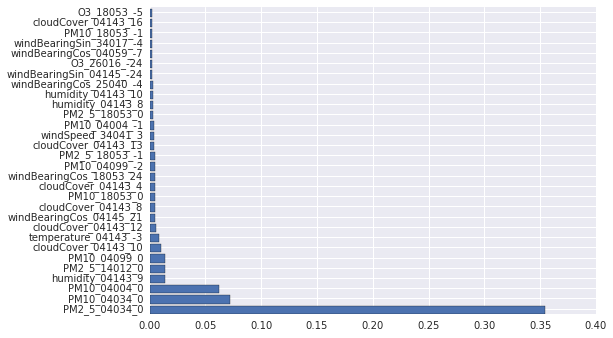

Fitting the model took 160 seconds
PM10_04143_9


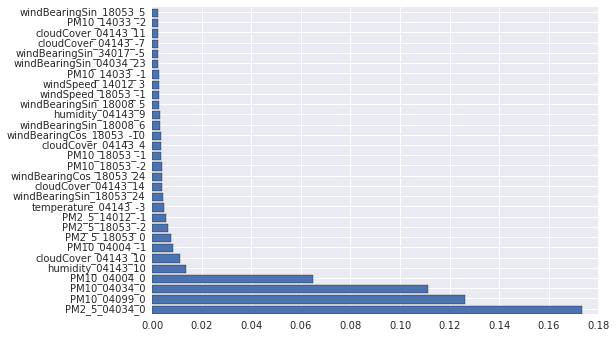

Fitting the model took 161 seconds
PM10_04143_10


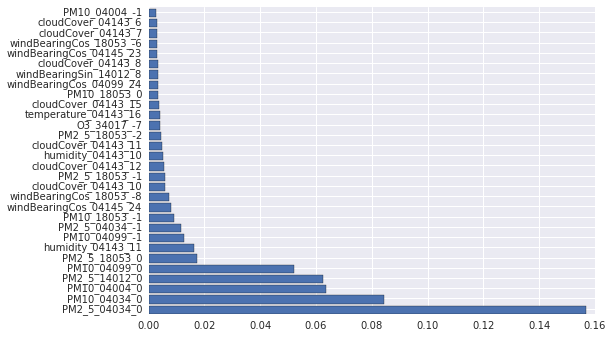

Fitting the model took 159 seconds
PM10_04143_11


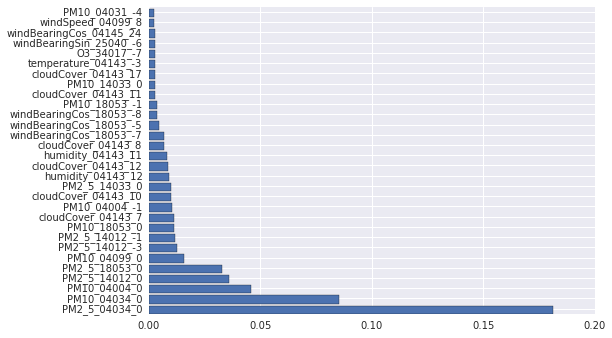

Fitting the model took 161 seconds
PM10_04143_12


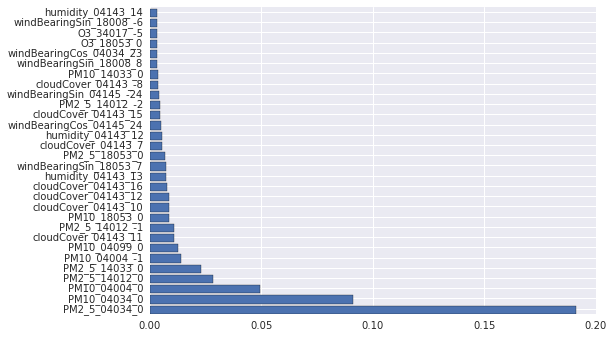

Fitting the model took 159 seconds
PM10_04143_13


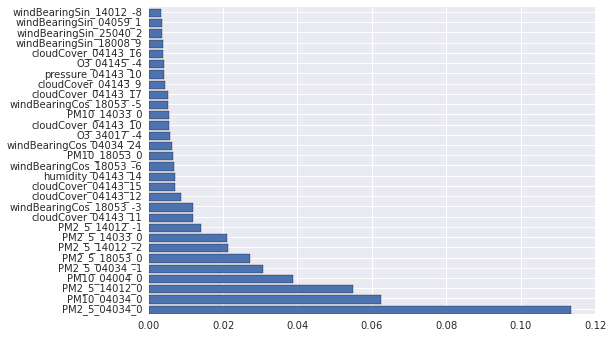

Fitting the model took 160 seconds
PM10_04143_14


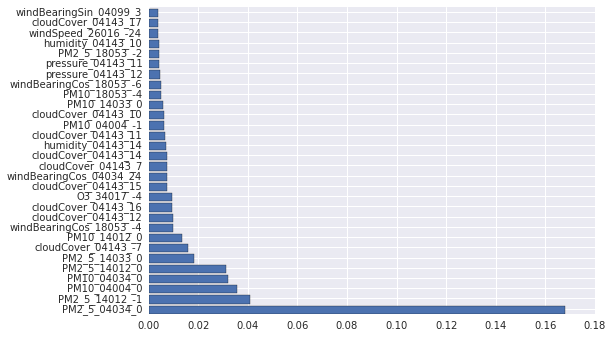

Fitting the model took 162 seconds
PM10_04143_15


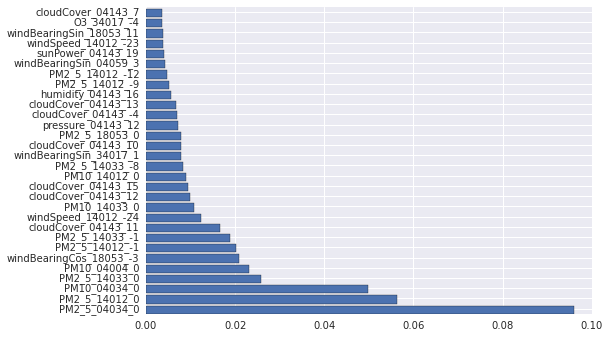

Fitting the model took 163 seconds
PM10_04143_16


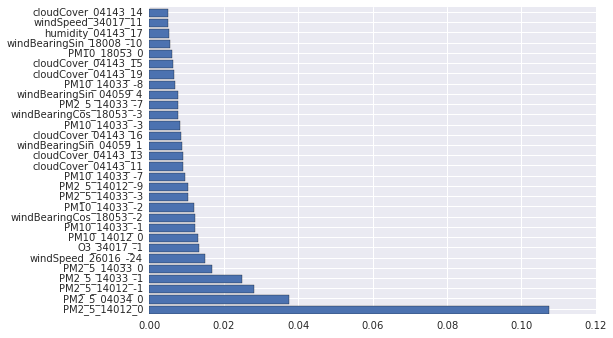

Fitting the model took 161 seconds
PM10_04143_17


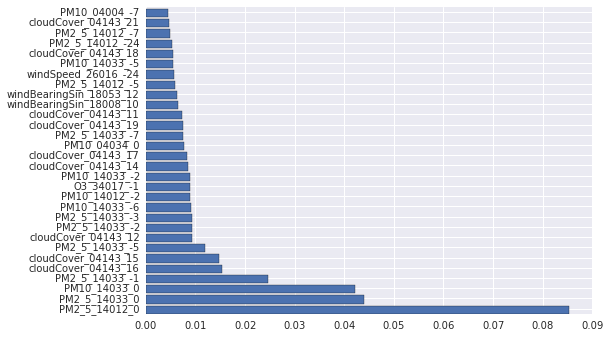

Fitting the model took 162 seconds
PM10_04143_18


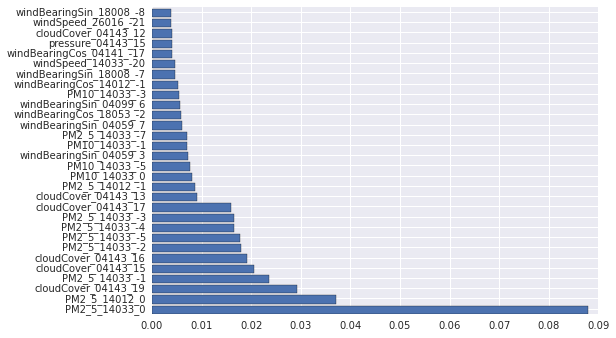

Fitting the model took 163 seconds
PM10_04143_19


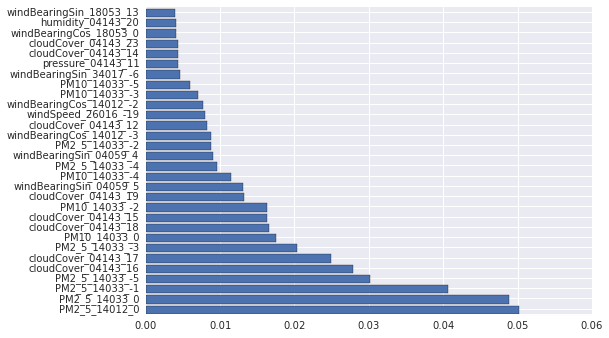

Fitting the model took 166 seconds
PM10_04143_20


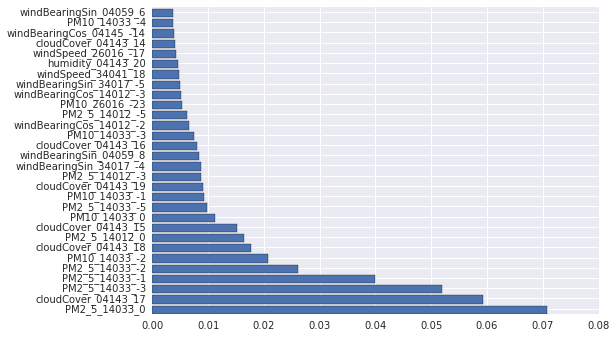

Fitting the model took 163 seconds
PM10_04143_21


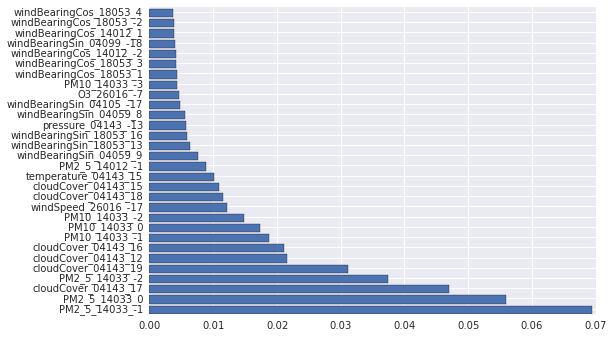

Fitting the model took 162 seconds
PM10_04143_22


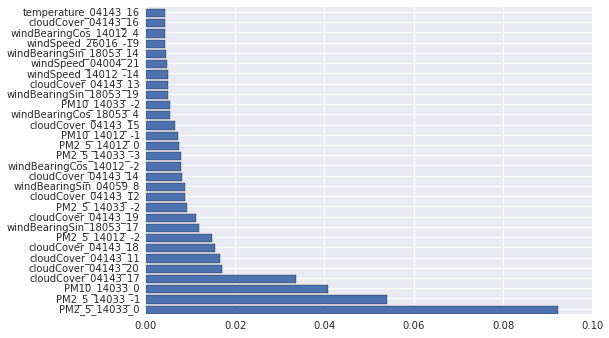

Fitting the model took 164 seconds
PM10_04143_23


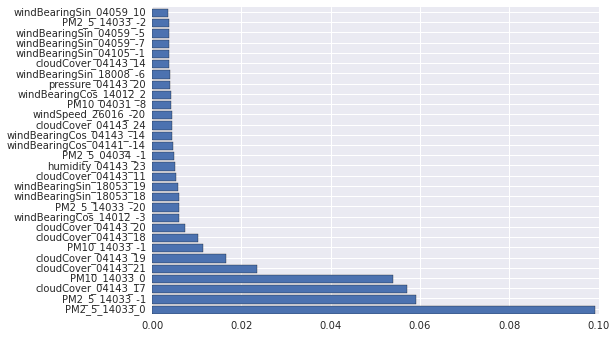

Fitting the model took 162 seconds
PM10_04143_24


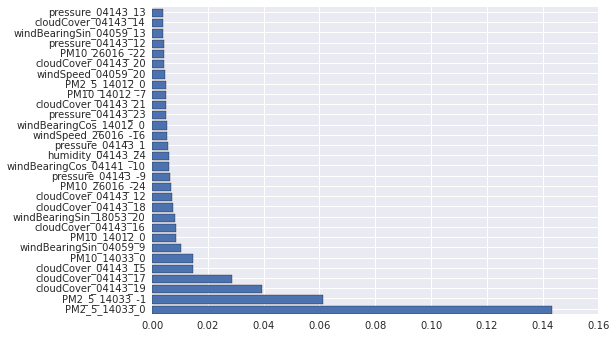

Fitting the model took 161 seconds
48
O3_04143_1


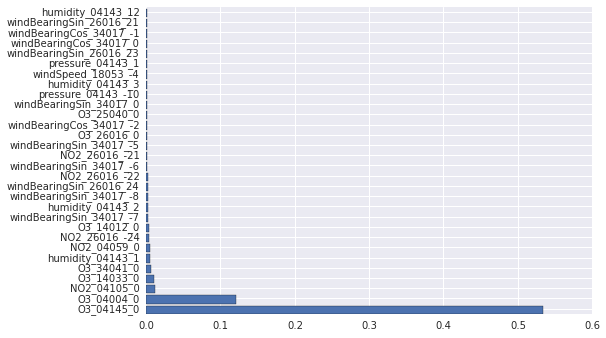

Fitting the model took 149 seconds
O3_04143_2


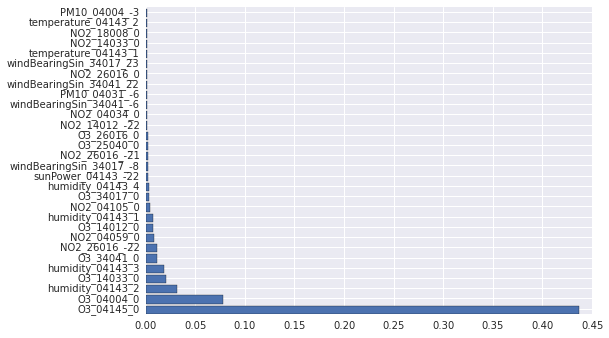

Fitting the model took 152 seconds
O3_04143_3


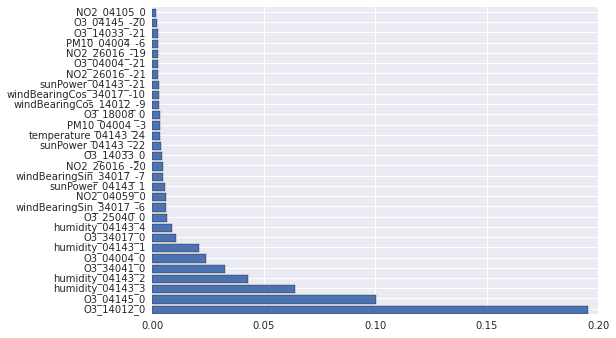

Fitting the model took 153 seconds
O3_04143_4


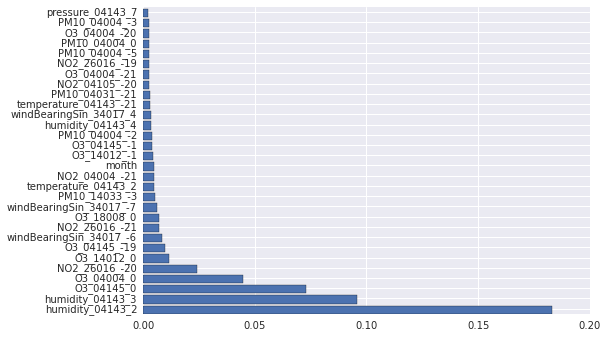

Fitting the model took 156 seconds
O3_04143_5


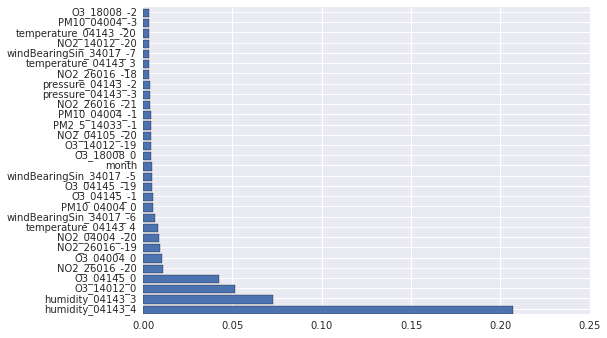

Fitting the model took 157 seconds
O3_04143_6


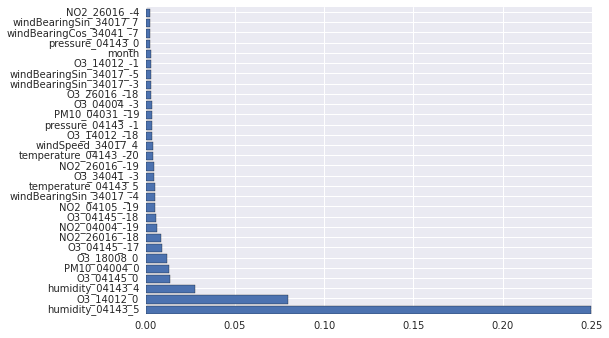

Fitting the model took 155 seconds
O3_04143_7


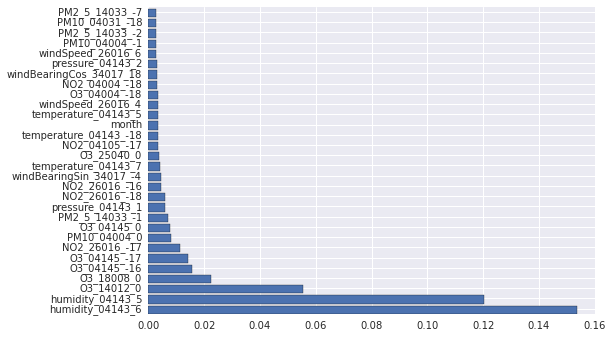

Fitting the model took 159 seconds
O3_04143_8


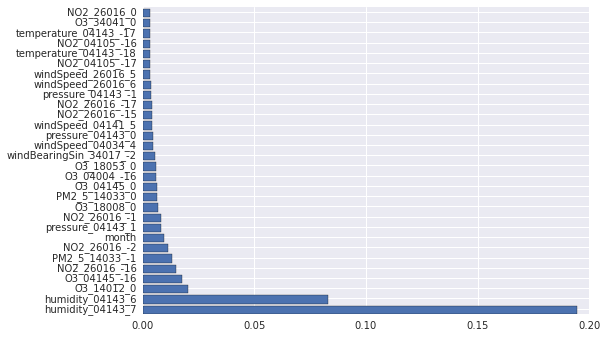

Fitting the model took 154 seconds
O3_04143_9


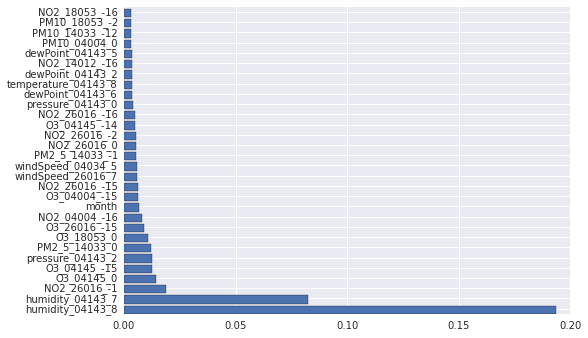

Fitting the model took 153 seconds
O3_04143_10


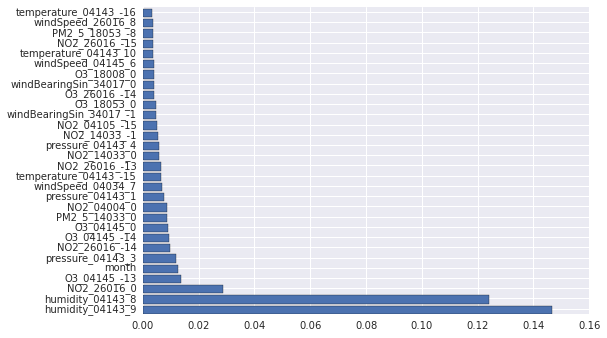

Fitting the model took 154 seconds
O3_04143_11


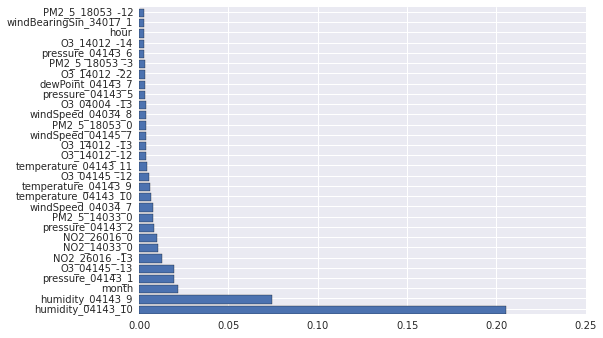

Fitting the model took 155 seconds
O3_04143_12


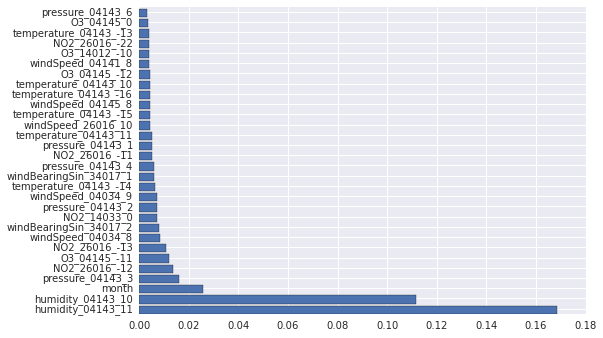

Fitting the model took 155 seconds
O3_04143_13


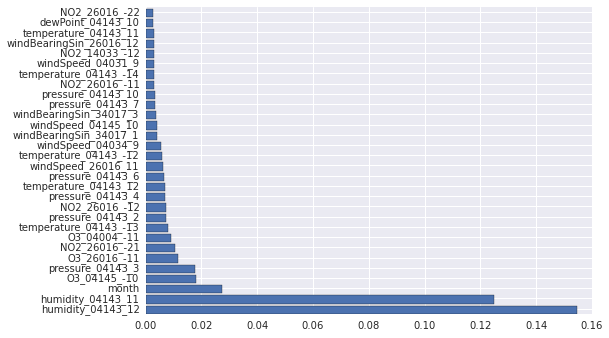

Fitting the model took 158 seconds
O3_04143_14


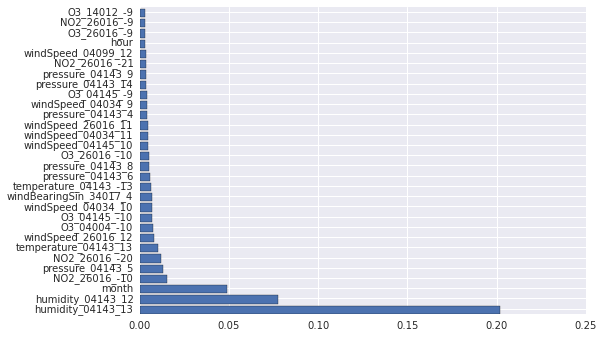

Fitting the model took 154 seconds
O3_04143_15


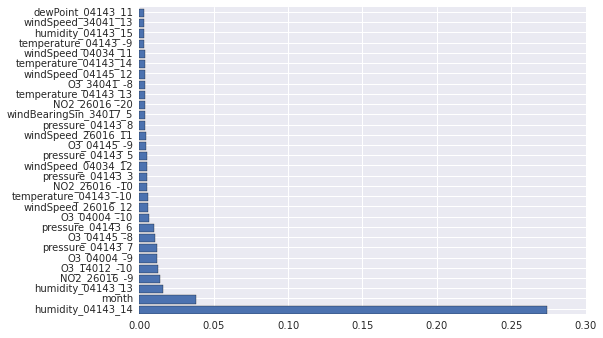

Fitting the model took 153 seconds
O3_04143_16


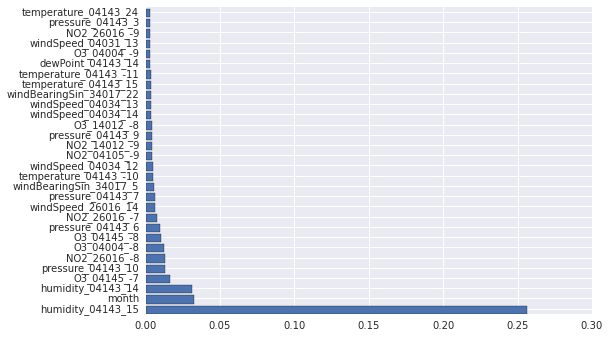

Fitting the model took 155 seconds
O3_04143_17


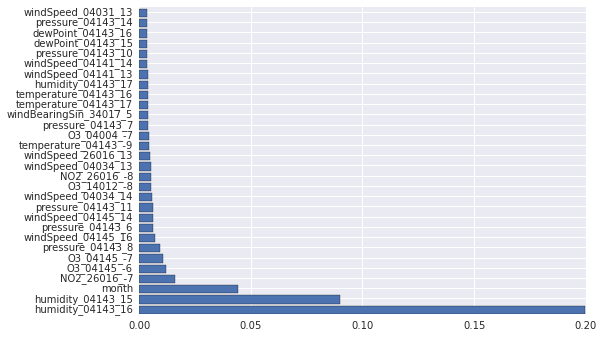

Fitting the model took 155 seconds
O3_04143_18


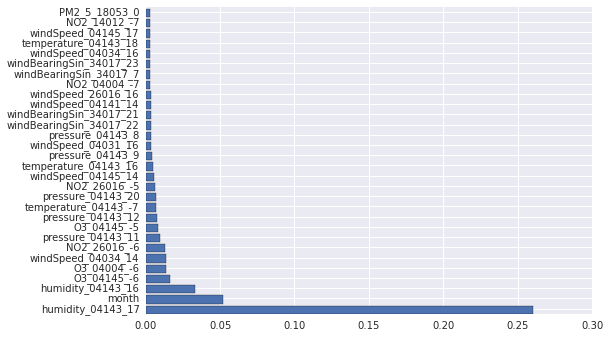

Fitting the model took 154 seconds
O3_04143_19


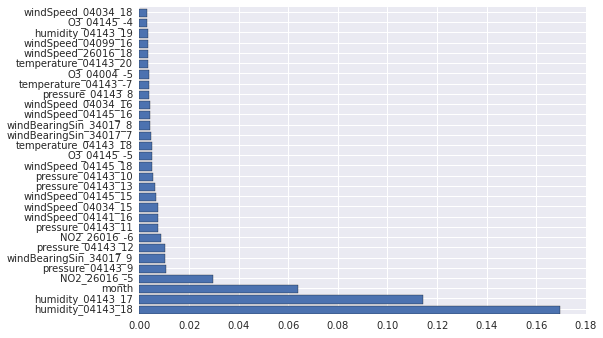

Fitting the model took 157 seconds
O3_04143_20


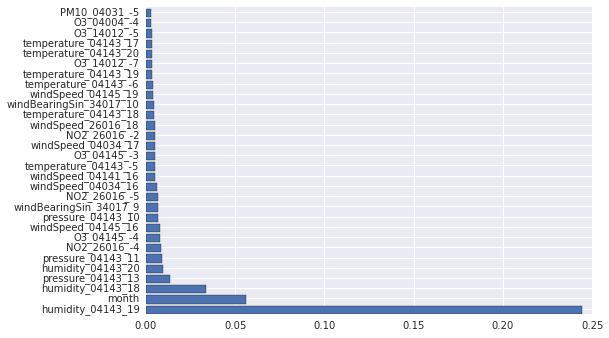

Fitting the model took 156 seconds
O3_04143_21


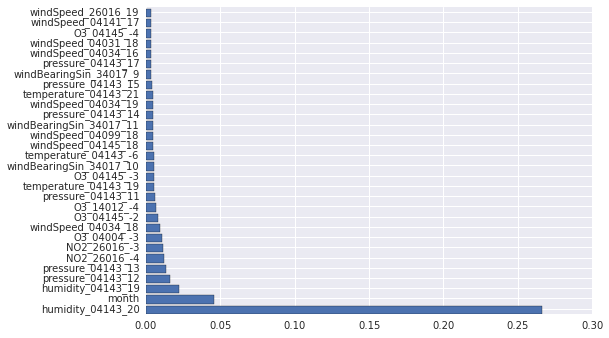

Fitting the model took 154 seconds
O3_04143_22


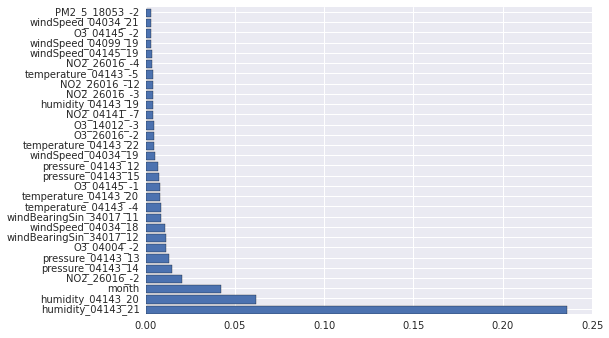

Fitting the model took 153 seconds
O3_04143_23


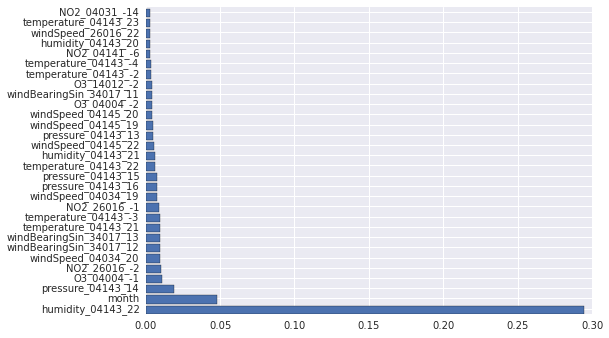

Fitting the model took 154 seconds
O3_04143_24


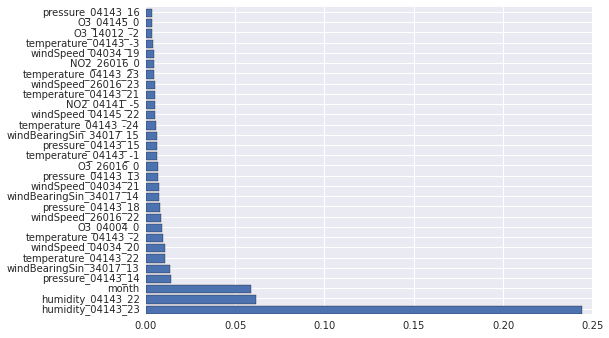

Fitting the model took 155 seconds
72
NO2_04143_1


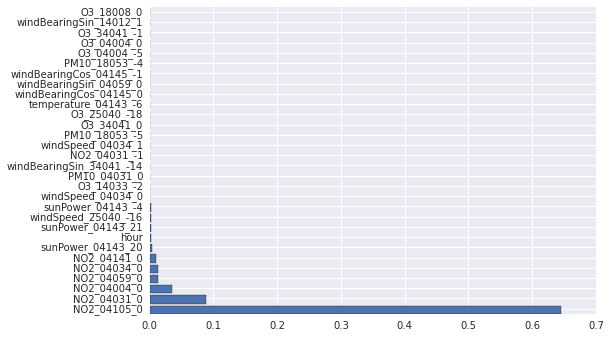

Fitting the model took 151 seconds
NO2_04143_2


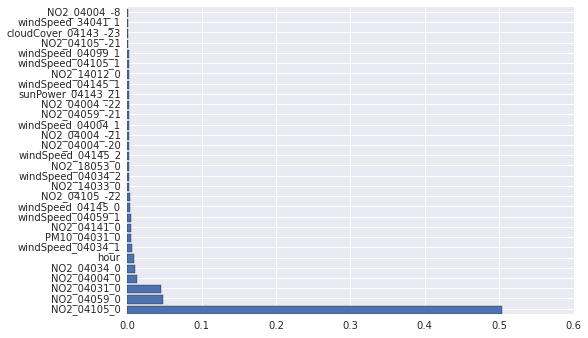

Fitting the model took 155 seconds
NO2_04143_3


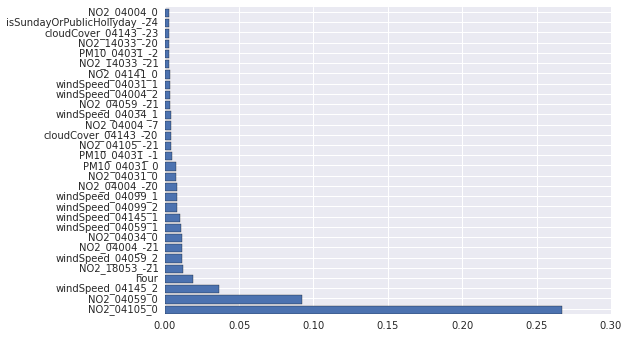

Fitting the model took 159 seconds
NO2_04143_4


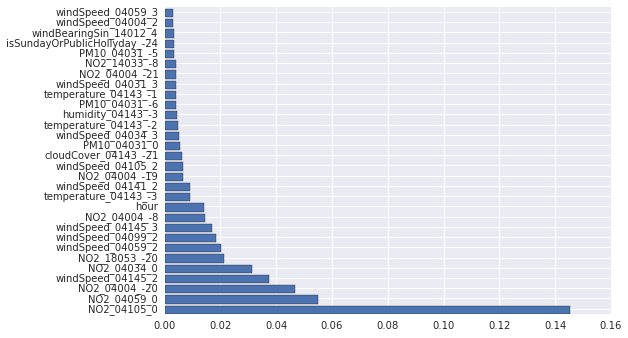

Fitting the model took 160 seconds
NO2_04143_5


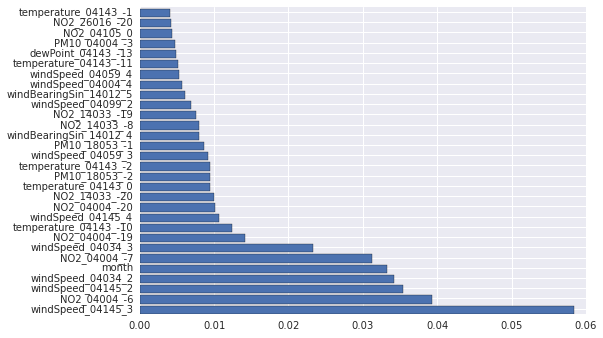

Fitting the model took 157 seconds
NO2_04143_6


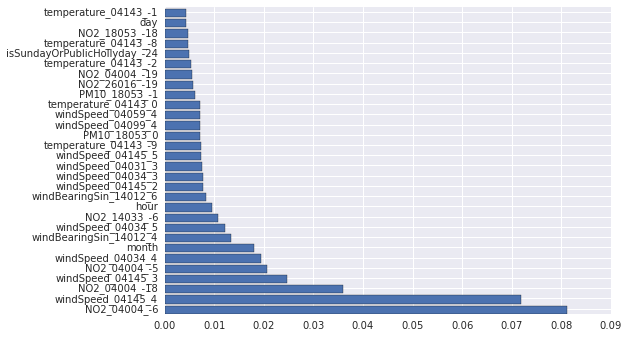

Fitting the model took 156 seconds
NO2_04143_7


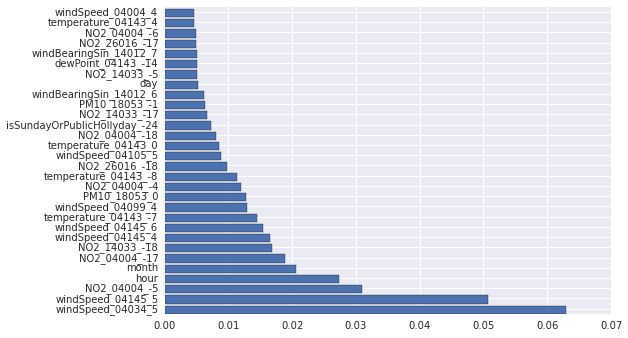

Fitting the model took 122790 seconds
NO2_04143_8


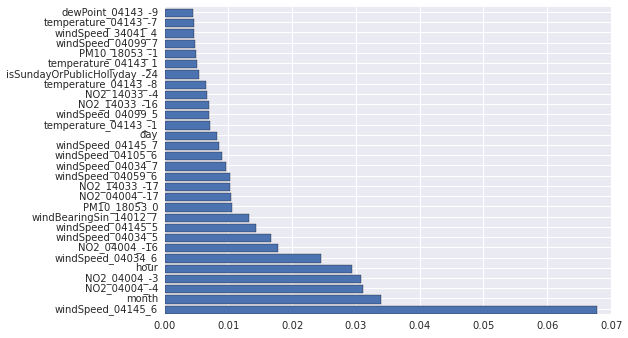

Fitting the model took 159 seconds
NO2_04143_9


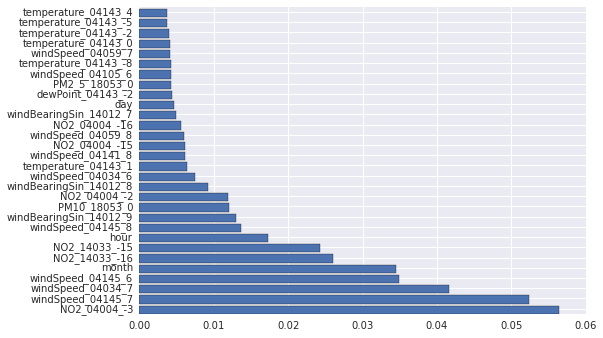

Fitting the model took 158 seconds
NO2_04143_10


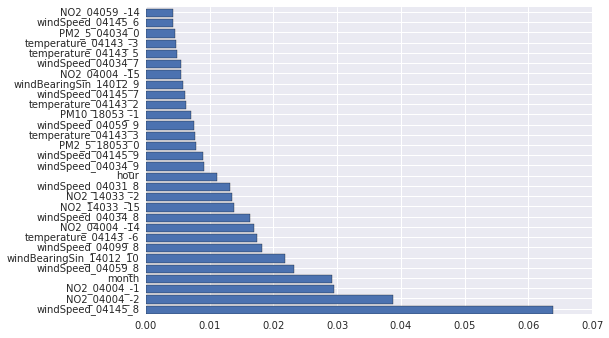

Fitting the model took 171 seconds
NO2_04143_11


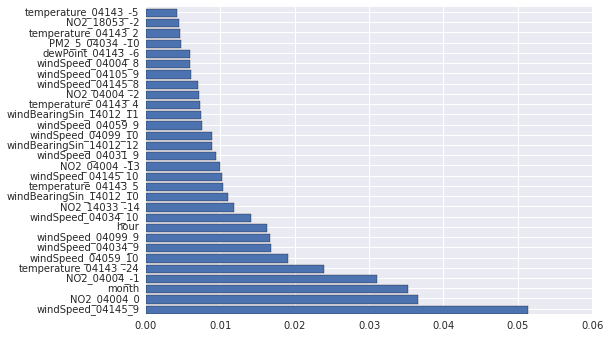

Fitting the model took 167 seconds
NO2_04143_12


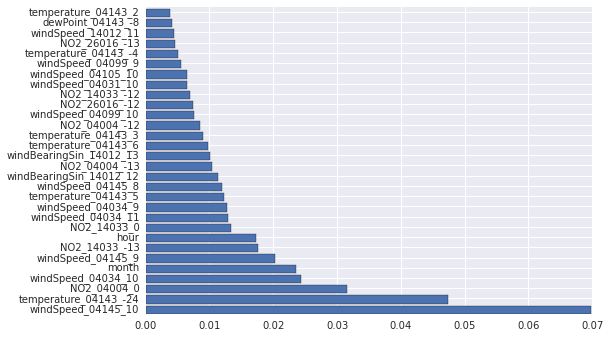

Fitting the model took 171 seconds
NO2_04143_13


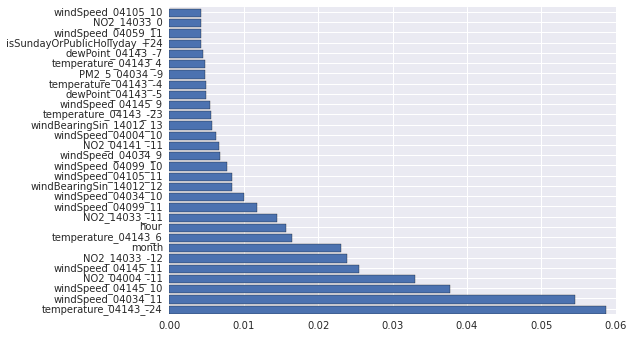

Fitting the model took 169 seconds
NO2_04143_14


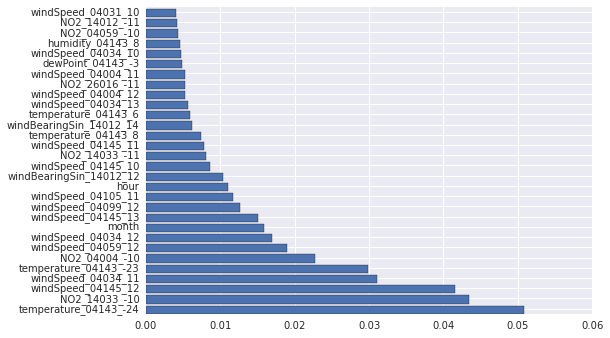

Fitting the model took 176 seconds
NO2_04143_15


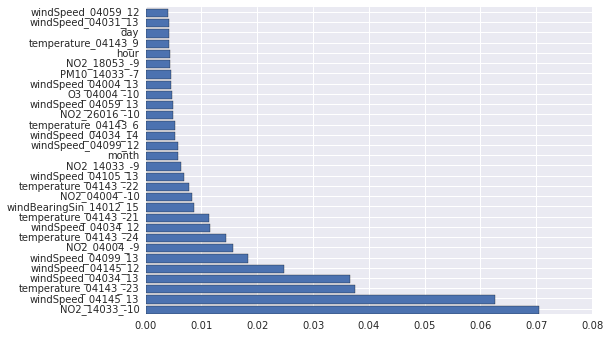

Fitting the model took 7034 seconds
NO2_04143_16


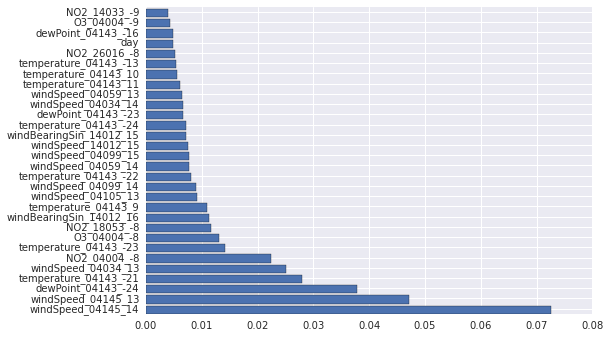

Fitting the model took 187 seconds
NO2_04143_17


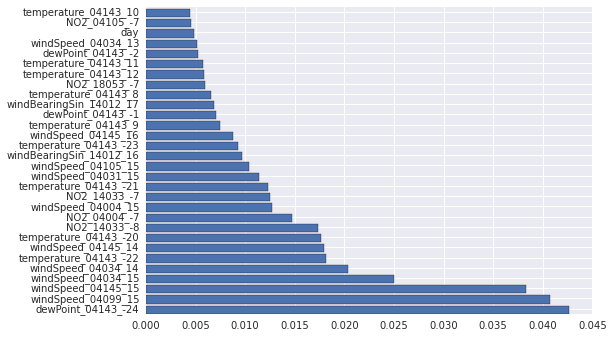

Fitting the model took 160 seconds
NO2_04143_18


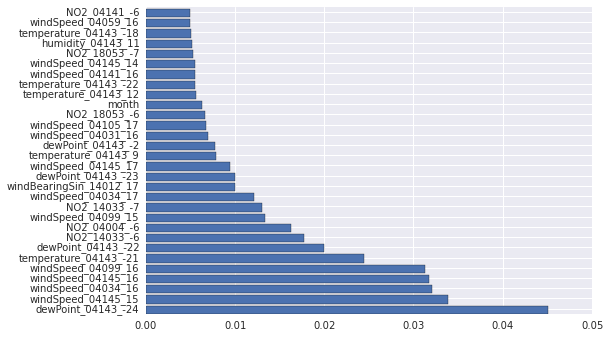

Fitting the model took 165 seconds
NO2_04143_19


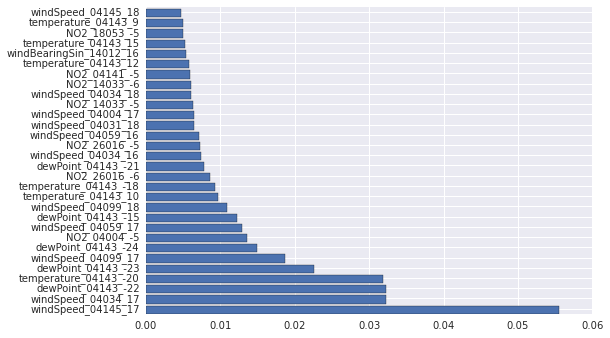

Fitting the model took 168 seconds
NO2_04143_20


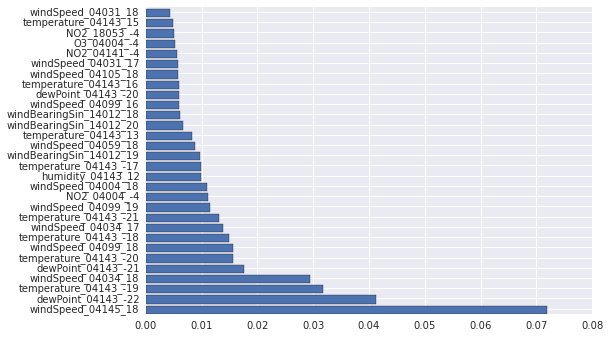

Fitting the model took 176 seconds
NO2_04143_21


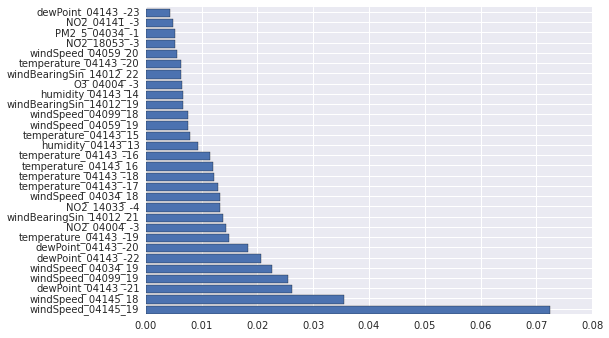

Fitting the model took 172 seconds
NO2_04143_22


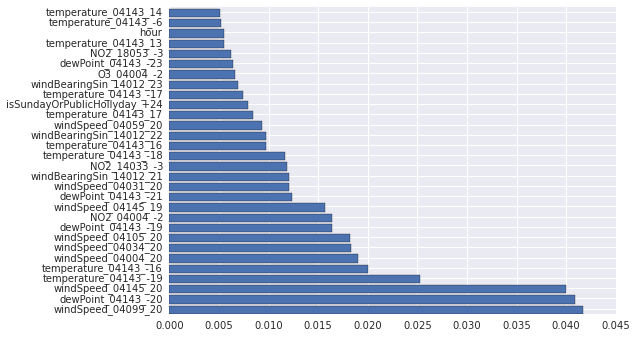

Fitting the model took 166 seconds
NO2_04143_23


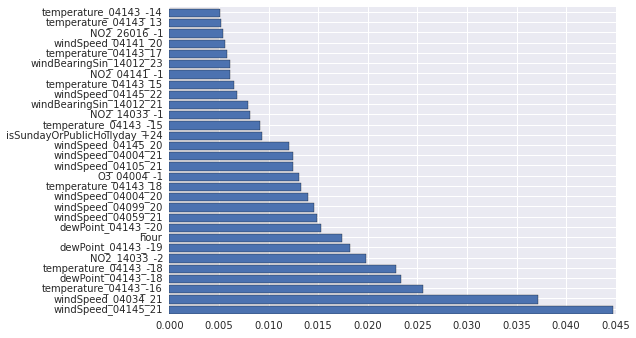

Fitting the model took 166 seconds
NO2_04143_24


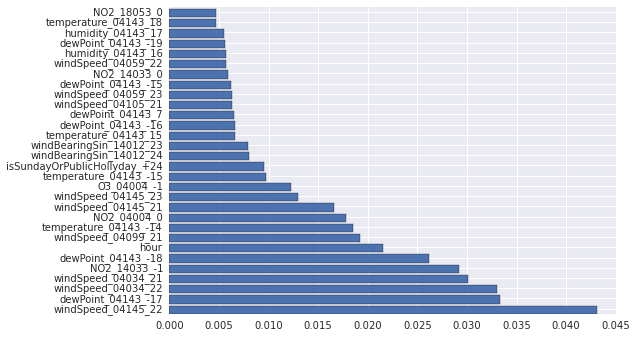

Fitting the model took 164 seconds
MSE :  53.5650640474
R2 :  0.824195227211


/home/asus/anaconda/lib/python2.7/site-packages/sklearn/metrics/regression.py:471: DeprecationWarning: Default 'multioutput' behavior now corresponds to 'variance_weighted' value, it will be changed to 'uniform_average' in 0.18.
  DeprecationWarning)


In [96]:
#Building a train test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, data_labels, test_size=0.2, random_state=42)


from sklearn.ensemble.forest import RandomForestRegressor
from time import time
n,m = y_test.shape

y_pred3 = np.zeros((n,m))
i=0
s = [PM2, PM10, O3,NO2]
clfs = []
for target in s:
    print i 
    
    l = len(target.columns)
    cols = target.columns
    for col in cols: 
        print col
        clf=RandomForestRegressor(n_estimators = 30,criterion='mse')
        start = time()
        clf.fit(X_train,target[col])
        
        clfs.append(clf)
        #if i%24 ==0   
        ordering = np.argsort(clf.feature_importances_)[::-1][:30]
        feature_names= X_train.columns[ordering]
        importances = clf.feature_importances_[ordering]
        x = np.arange(len(feature_names))
        plt.barh(x, importances)
        plt.yticks(x + 0.5, feature_names, fontsize=10)
        plt.show()
        end = time() - start
        print "Fitting the model took %d seconds"%end
       
        pred = clf.predict(X_test)
        y_pred3[:, i] = pred[:]
        i= i+1
        

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print "MSE : ", mean_squared_error(y_test,y_pred3)
print "R2 : ",r2_score(y_test,y_pred3)   
    

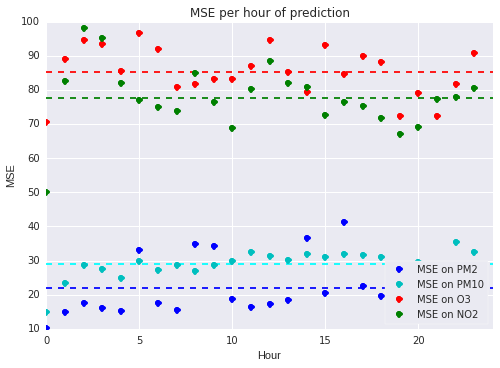

In [97]:
y_test2 = y_test.values

plot_MSE_per_hour(y_pred3, y_test2)

In [ ]:
from sklearn.cross_validation import cross_val_score
#scores = cross_val_score(reg, X_train, y_train, cv=5, scoring='mean_squared_error',n_jobs=3)

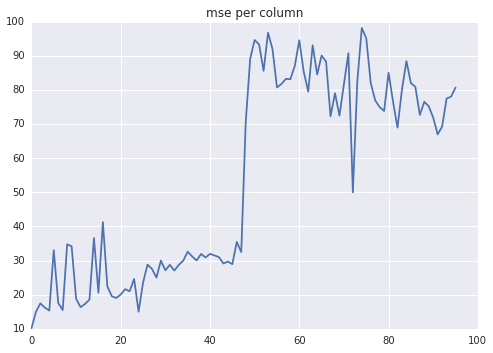

In [98]:
import seaborn as sb
sb.set_context
mse =  mean_squared_error(y_test,y_pred3, multioutput='raw_values')
s = np.arange(96)

plt.plot(s, mse)
plt.title("mse per column")
plt.show()
#MSE très bon sur PM2_5 et PM_10. 

In [99]:
mse

array([ 10.13182384,  14.93288828,  17.46356544,  16.21400262,
        15.35618417,  33.06776751,  17.58015284,  15.50664955,
        34.77343956,  34.1866368 ,  18.82703229,  16.33564149,
        17.28661209,  18.56209939,  36.62459834,  20.57344813,
        41.28508305,  22.46524953,  19.54090715,  19.04582156,
        20.05608812,  21.63345295,  21.00648094,  24.62790582,
        15.01660723,  23.52936174,  28.81839505,  27.5664849 ,
        25.02600251,  29.99995066,  27.14460783,  28.77118869,
        27.07776292,  28.74191318,  29.96902246,  32.61114232,
        31.20245373,  30.0422913 ,  31.94087107,  30.92048847,
        31.9816769 ,  31.50236093,  31.0211854 ,  29.14923135,
        29.72119078,  28.95034388,  35.48663414,  32.48422505,
        70.59788656,  89.225662  ,  94.69462679,  93.37454223,
        85.63055472,  96.85368394,  92.01548178,  80.7721566 ,
        81.80864005,  83.29385818,  83.19616484,  87.14103164,
        94.61889037,  85.34852604,  79.5500144 ,  93.15

In [100]:
print data_labels.shape
PM2 = data_labels.filter(regex='PM2')
PM10 = data_labels.filter(regex='PM10')
O3 = data_labels.filter(regex= "O3")
NO2= data_labels.filter(regex= "NO2")

(4031, 96)


In [101]:
from sklearn.ensemble.forest import RandomForestRegressor
from time import time
n = data_test.shape[0]
m = data_labels.shape[1]

labels_test = np.zeros((n,m))
i=0
s = [PM2, PM10, O3,NO2]
clfs = []
for target in s:
    print i 
    
    l = len(target.columns)
    cols = target.columns
    for col in cols: 
        print col
        clf=RandomForestRegressor(n_estimators = 100,criterion='mse')
        start = time()
        clf.fit(data_train,target[col])
        
        clfs.append(clf)
        #if i%24 ==0   
        end = time() - start
        print "Fitting the model took %d seconds"%end
       
        pred = clf.predict(data_test)
        labels_test[:, i] = pred[:]
        i= i+1
        

y_pred_final = pd.DataFrame(labels_test, columns = data_labels.columns)
y_pred_final.to_csv("./result.csv",index=False,sep=";")


0
PM2_5_04143_1
Fitting the model took 704 seconds
PM2_5_04143_2
Fitting the model took 689 seconds
PM2_5_04143_3
Fitting the model took 684 seconds
PM2_5_04143_4
Fitting the model took 689 seconds
PM2_5_04143_5
Fitting the model took 7740 seconds
PM2_5_04143_6
Fitting the model took 670 seconds
PM2_5_04143_7
Fitting the model took 660 seconds
PM2_5_04143_8
Fitting the model took 663 seconds
PM2_5_04143_9
Fitting the model took 668 seconds
PM2_5_04143_10
Fitting the model took 680 seconds
PM2_5_04143_11
Fitting the model took 668 seconds
PM2_5_04143_12
Fitting the model took 675 seconds
PM2_5_04143_13
Fitting the model took 679 seconds
PM2_5_04143_14
Fitting the model took 679 seconds
PM2_5_04143_15
Fitting the model took 683 seconds
PM2_5_04143_16
Fitting the model took 680 seconds
PM2_5_04143_17
Fitting the model took 681 seconds
PM2_5_04143_18
Fitting the model took 674 seconds
PM2_5_04143_19
Fitting the model took 1227 seconds
PM2_5_04143_20
Fitting the model took 687 seconds
PM2_5

In [102]:
from postprocessing import *

In [103]:
y_filtered = multi_polutant_averaged_postprocessing(labels_test, method = "Selection", weights=None)

In [104]:
y_filtered

array([[  9.58666667,  10.27620083,   9.099601  , ...,  71.19      ,
         70.42      ,  72.64      ],
       [ 10.27620083,   9.099601  ,   9.16733525, ...,  70.42      ,
         72.64      ,  74.84      ],
       [  9.099601  ,   9.16733525,   8.65506641, ...,  72.64      ,
         74.84      ,  72.52      ],
       ..., 
       [  5.98750943,   5.78633333,   5.66655463, ...,  36.59      ,
         31.54      ,  28.01      ],
       [  5.78633333,   5.66655463,   5.93248411, ...,  31.54      ,
         28.01      ,  23.64      ],
       [  5.66655463,   5.93248411,   6.2043688 , ...,  28.01      ,
         23.64      ,  19.89      ]])

In [105]:
y_pred_final = pd.DataFrame(y_filtered, columns = data_labels.columns)
y_pred_final.to_csv("./result_filtered.csv",index=False,sep=";")

In [7]:
PM2 = y_train.filter(regex='PM2')
PM10 = y_train.filter(regex='PM10')
O3 = y_train.filter(regex= "O3")
NO2= y_train.filter(regex= "NO2")
PM2_test = y_test.filter(regex='PM2')
PM10_test  = y_test.filter(regex='PM10')
O3_test  = y_test.filter(regex= "O3")
NO2_test = y_test.filter(regex= "NO2")

#recursive feature extraction 
#Building a train test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, data_labels, test_size=0.2, random_state=42)


from sklearn.ensemble.forest import RandomForestRegressor
from time import time
from sklearn.feature_selection import RFECV

i=0
s = [PM2, PM10, O3,NO2]
support = []
for target in s:
    print i 
    
    l = len(target.columns)
    cols = target.columns
    for col in cols: 
        print col
        clf=RandomForestRegressor(n_estimators = 10,criterion='mse')
        start = time()
        rfecv = RFECV(estimator=clf, step=1, cv=5,scoring='mean_squared_error')
        rfecv.fit(X_train,target[col])
        print("Optimal number of features : %d" % rfecv.n_features_)
        support.append(rfecv.support_)
        # Plot number of features VS. cross-validation scores
        plt.figure()
        plt.xlabel("Number of features selected")
        plt.ylabel("Cross validation score (nb of correct classifications)")
        plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
        plt.show()

        
        
        clfs.append(clf)  
        end = time() - start
        print "Fitting the model took %d seconds"%end
       

        


0
PM2_5_04143_1


KeyboardInterrupt: 

In [36]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, data_labels, test_size=0.2, random_state=42)


PM2 = y_train.filter(regex='PM2')
PM10 = y_train.filter(regex='PM10')
O3 = y_train.filter(regex= "O3")
NO2= y_train.filter(regex= "NO2")
PM2_test = y_test.filter(regex='PM2')
PM10_test  = y_test.filter(regex='PM10')
O3_test  = y_test.filter(regex= "O3")
NO2_test = y_test.filter(regex= "NO2")



print X_train.shape
print y_train.shape

(3224, 3728)
(3224, 96)


In [38]:
import seaborn as sb
sb.set_context

#Let's work on the first column of each pollutant 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb 
from time import time
n,m = y_test.shape

y_pred = np.zeros((n,m))
i=0
s = [PM2, PM10, O3,NO2]
clfs = []
for target in s:
    
    l = len(target.columns)
    col = target.columns[0]

    print col
    xgb_model = xgb.XGBRegressor()
    clf = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [200,300,400]}, verbose=1)
    
    
    start = time()
    clf.fit(X_train,target[col])
    print(clf.best_score_)
    print(clf.best_params_)
    clfs.append(clf)
    #if i%24 ==0   
    end = time() - start
    print "Fitting the model took %d seconds"%end

    pred = clf.predict(X_test)
    print "MSE : ", mean_squared_error(y_test[col],pred)
    print "R2 : ",r2_score(y_test[col],pred)

        




PM2_5_04143_1
Fitting the model took 30 seconds
MSE :  10.8058322123
R2 :  0.918025992973
PM10_04143_1
Fitting the model took 28 seconds
MSE :  14.7756959084
R2 :  0.913937377588
O3_04143_1
Fitting the model took 31 seconds
MSE :  61.2506828174
R2 :  0.884701197524
NO2_04143_1
Fitting the model took 29 seconds
MSE :  43.345838817
R2 :  0.885932733486


In [ ]:
def slope

In [23]:
testdf= pd.read_csv("best_result_so_far.csv", sep=";")
print data_test.shape
print testdf.shape

labels_test=testdf.values

(984, 3728)
(984, 96)


In [24]:
import seaborn as sb
sb.set_context

#Let's work on the first column of each pollutant 

from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
print data_labels.shape
PM2 = data_labels.filter(regex='PM2')
PM10 = data_labels.filter(regex='PM10')
O3 = data_labels.filter(regex= "O3")
NO2= data_labels.filter(regex= "NO2")


from time import time
n = data_test.shape[0]
m = data_labels.shape[1]

#labels_test = np.zeros((n,m))
i=0
s = [PM2, PM10, O3,NO2]
clfs = []
for target in s:
    print i 
    
    l = len(target.columns)
    cols = target.columns
    col = target.columns[0] 
    print col
    clf=GradientBoostingRegressor(n_estimators = 200)
    start = time()
    clf.fit(data_train,target[col])
        
    clfs.append(clf)
        #if i%24 ==0   
    end = time() - start
    print "Fitting the model took %d seconds"%end
       
    pred = clf.predict(data_test)
    labels_test[:, i] = pred[:]
    i= i+24

(4031, 96)
0
PM2_5_04143_1
Fitting the model took 261 seconds
24
PM10_04143_1
Fitting the model took 261 seconds
48
O3_04143_1
Fitting the model took 269 seconds
72
NO2_04143_1
Fitting the model took 256 seconds


In [26]:
from postprocessing import *
y_filtered = multi_polutant_averaged_postprocessing(labels_test, method = "Selection", weights=None)
y_pred_final = pd.DataFrame(y_filtered, columns = data_labels.columns)
y_pred_final.to_csv("./result_filtered.csv",index=False,sep=";")